### About the Data
Classifying celestial objects such as stars, galaxies, and quasars based on their spectral characteristics is fundamental to modern astronomy. Spectral analysis—considering attributes like temperature, luminosity, and chemical composition—provides deep insights into the physical nature and evolutionary phases of these objects. Historical efforts in stellar cataloging not only revealed the structure of our own galaxy but also led to the identification of external galaxies like Andromeda, marking a pivotal moment in cosmic discovery. This dataset is designed to support the classification of stars, galaxies, and quasars based on their spectral signatures.

### Column Descriptions

Each column in the dataset corresponds to a specific observational or classification parameter obtained from the Sloan Digital Sky Survey (SDSS):

* **obj\_ID**: A unique identifier assigned to each object in the SDSS image catalog.
* **alpha**: Right Ascension (RA) in degrees at the J2000 epoch, used to define the celestial longitude of an object.
* **delta**: Declination in degrees at the J2000 epoch, representing the celestial latitude of an object.
* **u, g, r, i, z**: Photometric magnitudes measured through five SDSS filters, capturing light intensity across different wavelength bands:

  * *u* – Ultraviolet
  * *g* – Green
  * *r* – Red
  * *i* – Near-infrared
  * *z* – Infrared
* **run\_ID**: Identifies the specific SDSS sky scan ("run") in which the object was recorded.
* **rerun\_ID**: Specifies the image processing version or calibration settings applied during data reduction.
* **cam\_col**: Indicates the camera column (or scanline) within the run, corresponding to a specific CCD sensor.
* **field\_ID**: Denotes a specific field or segment of the sky within a camera column.
* **spec\_obj\_ID**: Unique identifier for each object observed spectroscopically. Objects with the same `spec_obj_ID` are expected to have consistent spectral classifications (star, galaxy, or quasar).
* **class**: Spectral classification of the object, determined as either a **star**, **galaxy**, or **quasar**.
* **redshift**: A dimensionless measure of how much the wavelength of light from the object has been stretched due to cosmic expansion. It provides an estimate of distance and the object's relative motion.
* **plate**: Identifies the spectroscopic plate used to gather the light from multiple celestial objects during a given observation.
* **MJD**: Modified Julian Date of the observation, representing the time the data was captured in astronomical timekeeping.
* **fiber\_ID**: ID of the optical fiber that directed the object's light to the spectrograph. Each fiber corresponds to a unique target on a spectroscopic plate.

Together, these features enable detailed classification and analysis of celestial bodies, offering insights into their physical properties, distances, and evolutionary stages based on their spectral behavior.

### Celestial Object Descriptions

* **Quasars**
  Quasars, or quasi-stellar objects (QSOs), are among the brightest and most energetic phenomena in the universe. They are the active galactic nuclei (AGN) of distant galaxies, powered by supermassive black holes that range from millions to tens of billions of solar masses. As matter spirals into the black hole via an accretion disk, intense friction heats the gas, emitting vast amounts of electromagnetic radiation across the spectrum. Some quasars are so luminous that they can outshine entire galaxies, including the Milky Way, by thousands of times.

* **Stars**
  Stars originate from the gravitational collapse of gas clouds—primarily hydrogen with traces of helium and heavier elements. The star's mass dictates its entire evolutionary path. Throughout most of its life, a star fuses hydrogen into helium in its core, releasing energy that radiates into space. This process sustains the star’s brightness and heat. When nuclear fuel is exhausted, the star undergoes a transformation based on its mass, ending as a white dwarf, neutron star, or, in the case of very massive stars, a black hole.

* **Galaxies**
  A galaxy is a massive, gravitationally bound system composed of stars, stellar remnants, gas, dust, and a significant amount of dark matter. Galaxies can vary enormously in size—from dwarf galaxies containing fewer than a hundred million stars to giant ellipticals with over a hundred trillion stars orbiting their center of mass. Despite the brilliance of the stars, most of a galaxy's mass lies in its invisible dark matter halo. Almost all large galaxies host a supermassive black hole at their core, playing a key role in their dynamics and evolution.



In [52]:
# import libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, f1_score
from astropy.coordinates import SkyCoord
from astropy.coordinates import ICRS, Galactic, FK4, FK5
from astropy.coordinates import Angle, Latitude, Longitude
import astropy.units as unit

import warnings
warnings.filterwarnings('ignore')

In [53]:
star_data = pd.read_csv("dataset/star_classification.csv")

In [54]:
star_data.head()

obj_ID       alpha      delta         u         g         r  \
0  1.237661e+18  135.689107  32.494632  23.87882  22.27530  20.39501   
1  1.237665e+18  144.826101  31.274185  24.77759  22.83188  22.58444   
2  1.237661e+18  142.188790  35.582444  25.26307  22.66389  20.60976   
3  1.237663e+18  338.741038  -0.402828  22.13682  23.77656  21.61162   
4  1.237680e+18  345.282593  21.183866  19.43718  17.58028  16.49747   

          i         z  run_ID  rerun_ID  cam_col  field_ID   spec_obj_ID  \
0  19.16573  18.79371    3606       301        2        79  6.543777e+18   
1  21.16812  21.61427    4518       301        5       119  1.176014e+19   
2  19.34857  18.94827    3606       301        2       120  5.152200e+18   
3  20.50454  19.25010    4192       301        3       214  1.030107e+19   
4  15.97711  15.54461    8102       301        3       137  6.891865e+18   

    class  redshift  plate    MJD  fiber_ID  
0  GALAXY  0.634794   5812  56354       171  
1  GALAXY  0.779136  10445  58158       427  
2  GALAXY  0.644195   4576  55592       299  
3  GALAXY  0.932346   9149  58039       775  
4  GALAXY  0.116123   6121  56187       842

In [55]:
star_data.columns

Index(['obj_ID', 'alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID',
       'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'class', 'redshift',
       'plate', 'MJD', 'fiber_ID'],
      dtype='object')

In [56]:
star_data.shape

(100000, 18)

In [57]:
star_data.describe()

obj_ID          alpha          delta              u  \
count  1.000000e+05  100000.000000  100000.000000  100000.000000   
mean   1.237665e+18     177.629117      24.135305      21.980468   
std    8.438560e+12      96.502241      19.644665      31.769291   
min    1.237646e+18       0.005528     -18.785328   -9999.000000   
25%    1.237659e+18     127.518222       5.146771      20.352353   
50%    1.237663e+18     180.900700      23.645922      22.179135   
75%    1.237668e+18     233.895005      39.901550      23.687440   
max    1.237681e+18     359.999810      83.000519      32.781390   

                   g              r              i              z  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean       20.531387      19.645762      19.084854      18.668810   
std        31.750292       1.854760       1.757895      31.728152   
min     -9999.000000       9.822070       9.469903   -9999.000000   
25%        18.965230      18.135828      17.732285      17.460677   
50%        21.099835      20.125290      19.405145      19.004595   
75%        22.123767      21.044785      20.396495      19.921120   
max        31.602240      29.571860      32.141470      29.383740   

              run_ID  rerun_ID        cam_col       field_ID   spec_obj_ID  \
count  100000.000000  100000.0  100000.000000  100000.000000  1.000000e+05   
mean     4481.366060     301.0       3.511610     186.130520  5.783882e+18   
std      1964.764593       0.0       1.586912     149.011073  3.324016e+18   
min       109.000000     301.0       1.000000      11.000000  2.995191e+17   
25%      3187.000000     301.0       2.000000      82.000000  2.844138e+18   
50%      4188.000000     301.0       4.000000     146.000000  5.614883e+18   
75%      5326.000000     301.0       5.000000     241.000000  8.332144e+18   
max      8162.000000     301.0       6.000000     989.000000  1.412694e+19   

            redshift          plate            MJD       fiber_ID  
count  100000.000000  100000.000000  100000.000000  100000.000000  
mean        0.576661    5137.009660   55588.647500     449.312740  
std         0.730707    2952.303351    1808.484233     272.498404  
min        -0.009971     266.000000   51608.000000       1.000000  
25%         0.054517    2526.000000   54234.000000     221.000000  
50%         0.424173    4987.000000   55868.500000     433.000000  
75%         0.704154    7400.250000   56777.000000     645.000000  
max         7.011245   12547.000000   58932.000000    1000.000000

In [58]:
star_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

## Checking Missing Values and Handling them

In [59]:
star_data.isnull().sum()

obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64

## Removing irrelavent Columns

As the ID columns are the unique values for the dataset we are checking the values and droping form the dataset

In [60]:
columns = ['obj_ID', 'run_ID', 'rerun_ID', 'field_ID', 'spec_obj_ID', 'fiber_ID']

# Loop through the column names and calculate unique values for each
for col in columns:
    unique_count = star_data[col].nunique()
    print(f"The unique values in {col} are {unique_count}")

The unique values in obj_ID are 78053
The unique values in run_ID are 430
The unique values in rerun_ID are 1
The unique values in field_ID are 856
The unique values in spec_obj_ID are 100000
The unique values in fiber_ID are 1000


In [61]:
star_data.drop(columns= columns, axis= 1, inplace= True)

In [62]:
star_data.head()

alpha      delta         u         g         r         i         z  \
0  135.689107  32.494632  23.87882  22.27530  20.39501  19.16573  18.79371   
1  144.826101  31.274185  24.77759  22.83188  22.58444  21.16812  21.61427   
2  142.188790  35.582444  25.26307  22.66389  20.60976  19.34857  18.94827   
3  338.741038  -0.402828  22.13682  23.77656  21.61162  20.50454  19.25010   
4  345.282593  21.183866  19.43718  17.58028  16.49747  15.97711  15.54461   

   cam_col   class  redshift  plate    MJD  
0        2  GALAXY  0.634794   5812  56354  
1        5  GALAXY  0.779136  10445  58158  
2        2  GALAXY  0.644195   4576  55592  
3        3  GALAXY  0.932346   9149  58039  
4        3  GALAXY  0.116123   6121  56187

In [63]:
star_data.columns

Index(['alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'cam_col', 'class',
       'redshift', 'plate', 'MJD'],
      dtype='object')

In [64]:
star_data['cam_col'].unique()

array([2, 5, 3, 4, 6, 1])

### Taking out 5 records from data set to check performance in the deployed model

In [65]:
sample_data = star_data.sample(n = 5, random_state=47)

sample_data.to_csv("checking.csv", index = False)

star_data.drop(sample_data.index)

star_data.head()

alpha      delta         u         g         r         i         z  \
0  135.689107  32.494632  23.87882  22.27530  20.39501  19.16573  18.79371   
1  144.826101  31.274185  24.77759  22.83188  22.58444  21.16812  21.61427   
2  142.188790  35.582444  25.26307  22.66389  20.60976  19.34857  18.94827   
3  338.741038  -0.402828  22.13682  23.77656  21.61162  20.50454  19.25010   
4  345.282593  21.183866  19.43718  17.58028  16.49747  15.97711  15.54461   

   cam_col   class  redshift  plate    MJD  
0        2  GALAXY  0.634794   5812  56354  
1        5  GALAXY  0.779136  10445  58158  
2        2  GALAXY  0.644195   4576  55592  
3        3  GALAXY  0.932346   9149  58039  
4        3  GALAXY  0.116123   6121  56187

In [66]:
sample_data

alpha      delta         u         g         r         i  \
93899    5.594267   0.139084  22.03138  21.03268  20.07739  19.64677   
66968   15.173133  -6.363763  25.98026  22.76439  20.84574  19.72769   
82817  127.270683  19.672462  23.14354  21.76209  19.95079  19.13606   
23556   38.325890  -3.766826  21.46732  20.73737  20.75849  20.75842   
61885   39.724400  -0.587740  21.08614  20.65918  19.92450  19.51583   

              z  cam_col   class  redshift  plate    MJD  
93899  19.37896        4  GALAXY  0.288054   4219  55480  
66968  19.06375        6  GALAXY  0.548455   7156  56959  
82817  18.57599        5  GALAXY  0.372808   4483  55587  
23556  20.56014        4    STAR -0.000533   4386  55540  
61885  19.30347        2  GALAXY  0.455118   1070  52591

## Exploratory Data Analysis (EDA)

In [67]:
data = star_data.drop(columns='class', axis= 1)
data.head()

alpha      delta         u         g         r         i         z  \
0  135.689107  32.494632  23.87882  22.27530  20.39501  19.16573  18.79371   
1  144.826101  31.274185  24.77759  22.83188  22.58444  21.16812  21.61427   
2  142.188790  35.582444  25.26307  22.66389  20.60976  19.34857  18.94827   
3  338.741038  -0.402828  22.13682  23.77656  21.61162  20.50454  19.25010   
4  345.282593  21.183866  19.43718  17.58028  16.49747  15.97711  15.54461   

   cam_col  redshift  plate    MJD  
0        2  0.634794   5812  56354  
1        5  0.779136  10445  58158  
2        2  0.644195   4576  55592  
3        3  0.932346   9149  58039  
4        3  0.116123   6121  56187

### Data Normalization

In [68]:
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

In [69]:
data

array([[0.37690482, 0.50380246, 0.99911256, ..., 0.09183086, 0.45159189,
        0.64800655],
       [0.40228576, 0.49181212, 0.99920216, ..., 0.11238889, 0.8288413 ,
        0.89432004],
       [0.39495978, 0.53413882, 0.99925055, ..., 0.09316979, 0.35094862,
        0.54396505],
       ...,
       [0.62384846, 0.33880973, 0.99884246, ..., 0.02183899, 0.20340363,
        0.399645  ],
       [0.58962907, 0.6429744 , 0.99925925, ..., 0.06622931, 0.52805146,
        0.64991808],
       [0.54692681, 0.67052516, 0.99898725, ..., 0.07874916, 0.58171159,
        0.75040961]], shape=(100000, 11))

In [70]:
data = pd.DataFrame(data= data, columns= ['alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'cam_col',
       'redshift', 'plate', 'MJD'])

In [71]:
data.head()

alpha     delta         u         g         r         i         z  \
0  0.376905  0.503802  0.999113  0.999070  0.535344  0.427665  0.998944   
1  0.402286  0.491812  0.999202  0.999126  0.646203  0.515986  0.999225   
2  0.394960  0.534139  0.999251  0.999109  0.546218  0.435729  0.998959   
3  0.940947  0.180600  0.998939  0.999220  0.596946  0.486717  0.998990   
4  0.959118  0.392679  0.998670  0.998602  0.337999  0.287021  0.998620   

   cam_col  redshift     plate       MJD  
0      0.2  0.091831  0.451592  0.648007  
1      0.8  0.112389  0.828841  0.894320  
2      0.2  0.093170  0.350949  0.543965  
3      0.4  0.134210  0.723312  0.878072  
4      0.4  0.017959  0.476753  0.625205

In [72]:
data['class'] = star_data['class']

In [73]:
data.head()

alpha     delta         u         g         r         i         z  \
0  0.376905  0.503802  0.999113  0.999070  0.535344  0.427665  0.998944   
1  0.402286  0.491812  0.999202  0.999126  0.646203  0.515986  0.999225   
2  0.394960  0.534139  0.999251  0.999109  0.546218  0.435729  0.998959   
3  0.940947  0.180600  0.998939  0.999220  0.596946  0.486717  0.998990   
4  0.959118  0.392679  0.998670  0.998602  0.337999  0.287021  0.998620   

   cam_col  redshift     plate       MJD   class  
0      0.2  0.091831  0.451592  0.648007  GALAXY  
1      0.8  0.112389  0.828841  0.894320  GALAXY  
2      0.2  0.093170  0.350949  0.543965  GALAXY  
3      0.4  0.134210  0.723312  0.878072  GALAXY  
4      0.4  0.017959  0.476753  0.625205  GALAXY

Checking Distribution of the target variable 'class' before analysis

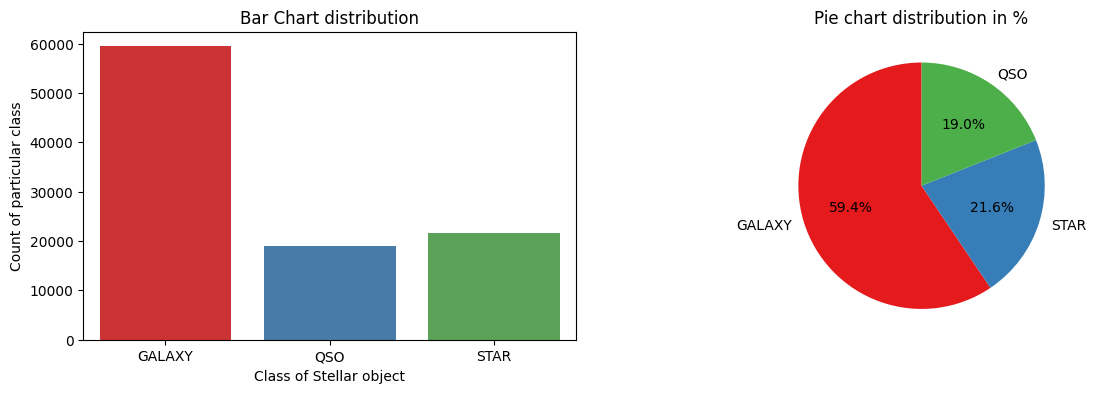

In [74]:
plt.figure(figsize= (14,4))

plt.subplot(1,2,1)
palette_colors = sns.color_palette("Set1")
ax = sns.countplot(data= data, x= 'class', palette= palette_colors)
plt.xlabel("Class of Stellar object")
plt.ylabel("Count of particular class")
plt.title("Bar Chart distribution")


plt.subplot(1,2,2)
distribution = data['class'].value_counts()
plt.pie(x=distribution, labels= distribution.index, autopct= '%1.1f%%', startangle=90, colors= sns.color_palette('Set1') )
plt.title("Pie chart distribution in %")
plt.show()

We have an imbalanced data target distribution.

In [75]:
mask = (data['u'] == -9999.0) | (data['g'] == -9999.0) | (data['r'] == -9999.0) | (data['i'] == -9999.0) | (data['z'] == -9999.0)

data = data[~mask]
data.describe()

alpha          delta              u              g  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean        0.493407       0.421676       0.998923       0.998896   
std         0.268066       0.193000       0.003167       0.003165   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.354208       0.235122       0.998761       0.998740   
50%         0.502495       0.416868       0.998943       0.998953   
75%         0.649703       0.576572       0.999093       0.999055   
max         1.000000       1.000000       1.000000       1.000000   

                   r              i              z        cam_col  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean        0.497407       0.424097       0.998932       0.502322   
std         0.093913       0.077537       0.003164       0.317382   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.420954       0.364438       0.998811       0.200000   
50%         0.521688       0.438225       0.998965       0.600000   
75%         0.568245       0.481951       0.999056       0.800000   
max         1.000000       1.000000       1.000000       1.000000   

            redshift          plate            MJD  
count  100000.000000  100000.000000  100000.000000  
mean        0.083551       0.396630       0.543507  
std         0.104071       0.240396       0.246926  
min         0.000000       0.000000       0.000000  
25%         0.009185       0.184024       0.358547  
50%         0.061833       0.384415       0.581718  
75%         0.101710       0.580918       0.705762  
max         1.000000       1.000000       1.000000

### Mollweide Projection

The positions of the objects can be plotted on a celestial sphere, allowing you to see the distribution of objects in the sky.

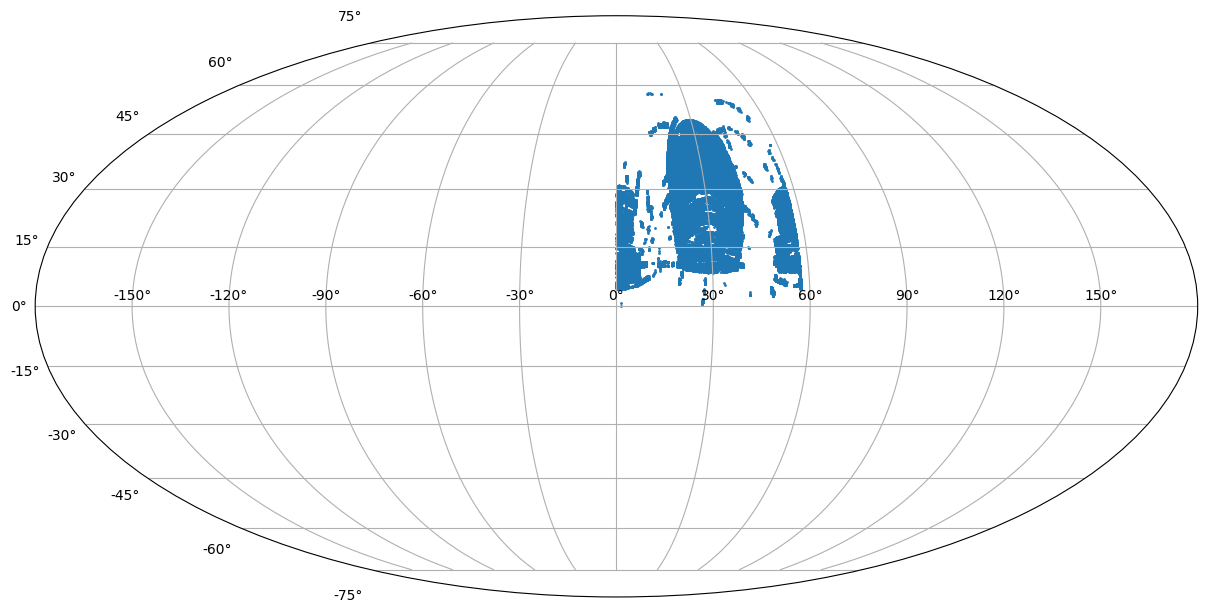

In [76]:
ra = Longitude(data['alpha'], unit.radian)
dec = Latitude(data['delta'], unit.radian)
coords = SkyCoord(ra=ra, dec=dec, frame='icrs')


fig = plt.figure(figsize=(15, 15))
axis = fig.add_subplot(111, projection="mollweide")
axis.scatter(coords.ra.wrap_at(180*unit.degree).radian, coords.dec.radian, s=1)

axis.grid(True)
plt.show()

### Encoding the class variable

We will be changing the 'class' variable values to number in the dataset using encoding

In [77]:
data['class'] = data['class'].map({'GALAXY': 0, 'STAR': 1, 'QSO': 2})
data.head()

alpha     delta         u         g         r         i         z  \
0  0.376905  0.503802  0.999113  0.999070  0.535344  0.427665  0.998944   
1  0.402286  0.491812  0.999202  0.999126  0.646203  0.515986  0.999225   
2  0.394960  0.534139  0.999251  0.999109  0.546218  0.435729  0.998959   
3  0.940947  0.180600  0.998939  0.999220  0.596946  0.486717  0.998990   
4  0.959118  0.392679  0.998670  0.998602  0.337999  0.287021  0.998620   

   cam_col  redshift     plate       MJD  class  
0      0.2  0.091831  0.451592  0.648007      0  
1      0.8  0.112389  0.828841  0.894320      0  
2      0.2  0.093170  0.350949  0.543965      0  
3      0.4  0.134210  0.723312  0.878072      0  
4      0.4  0.017959  0.476753  0.625205      0

### Outlier Analysis

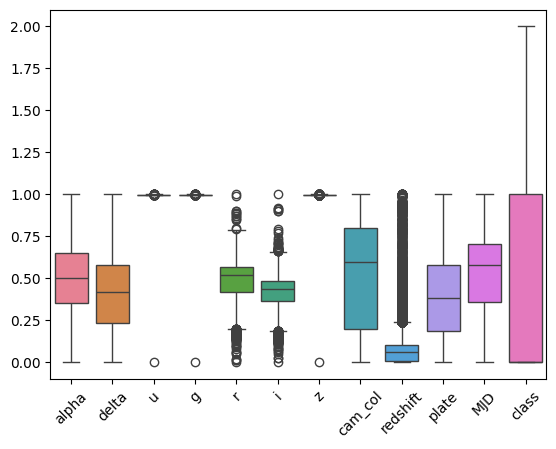

In [78]:
sns.boxplot(data=data)
plt.xticks(rotation=45)
plt.show()

From the above plot we can see there are ouliers in the columns 'u', 'g', 'r', 'i', 'z', and more in 'red shift'. Let us try to remove them.

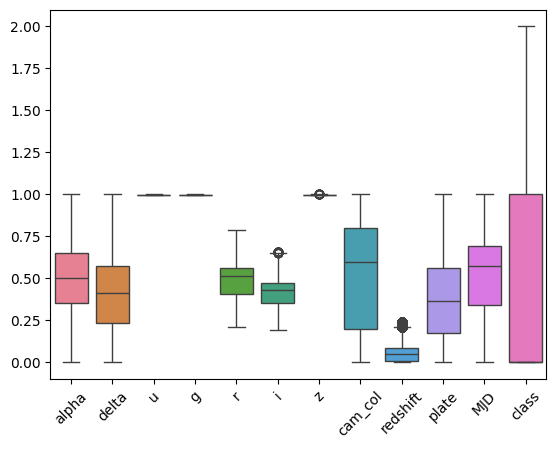

In [79]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Filter out the outliers
    filtered_df = df[(df[column] >= lower) & (df[column] <= upper)]
    return filtered_df

# Create a copy of the data
data_clean = data.copy()

# Remove outliers for each numeric column
for col in data_clean.select_dtypes(include='number').columns:
    data_clean = remove_outliers(data_clean, col)

# Plot the boxplot with outliers removed
sns.boxplot(data=data_clean)
plt.xticks(rotation=45)
plt.show()

In [80]:
# Let us now check the percent of ouliers compared to data with outlier
removed_percent = ((data.shape[0] - data_clean.shape[0]) / data.shape[0]) * 100
print(f'Percentage of outliers removed from the data set is {removed_percent}%')

Percentage of outliers removed from the data set is 9.4%


Percentage of outliers removed from the data set is 9.4%

### Univariate Analysis

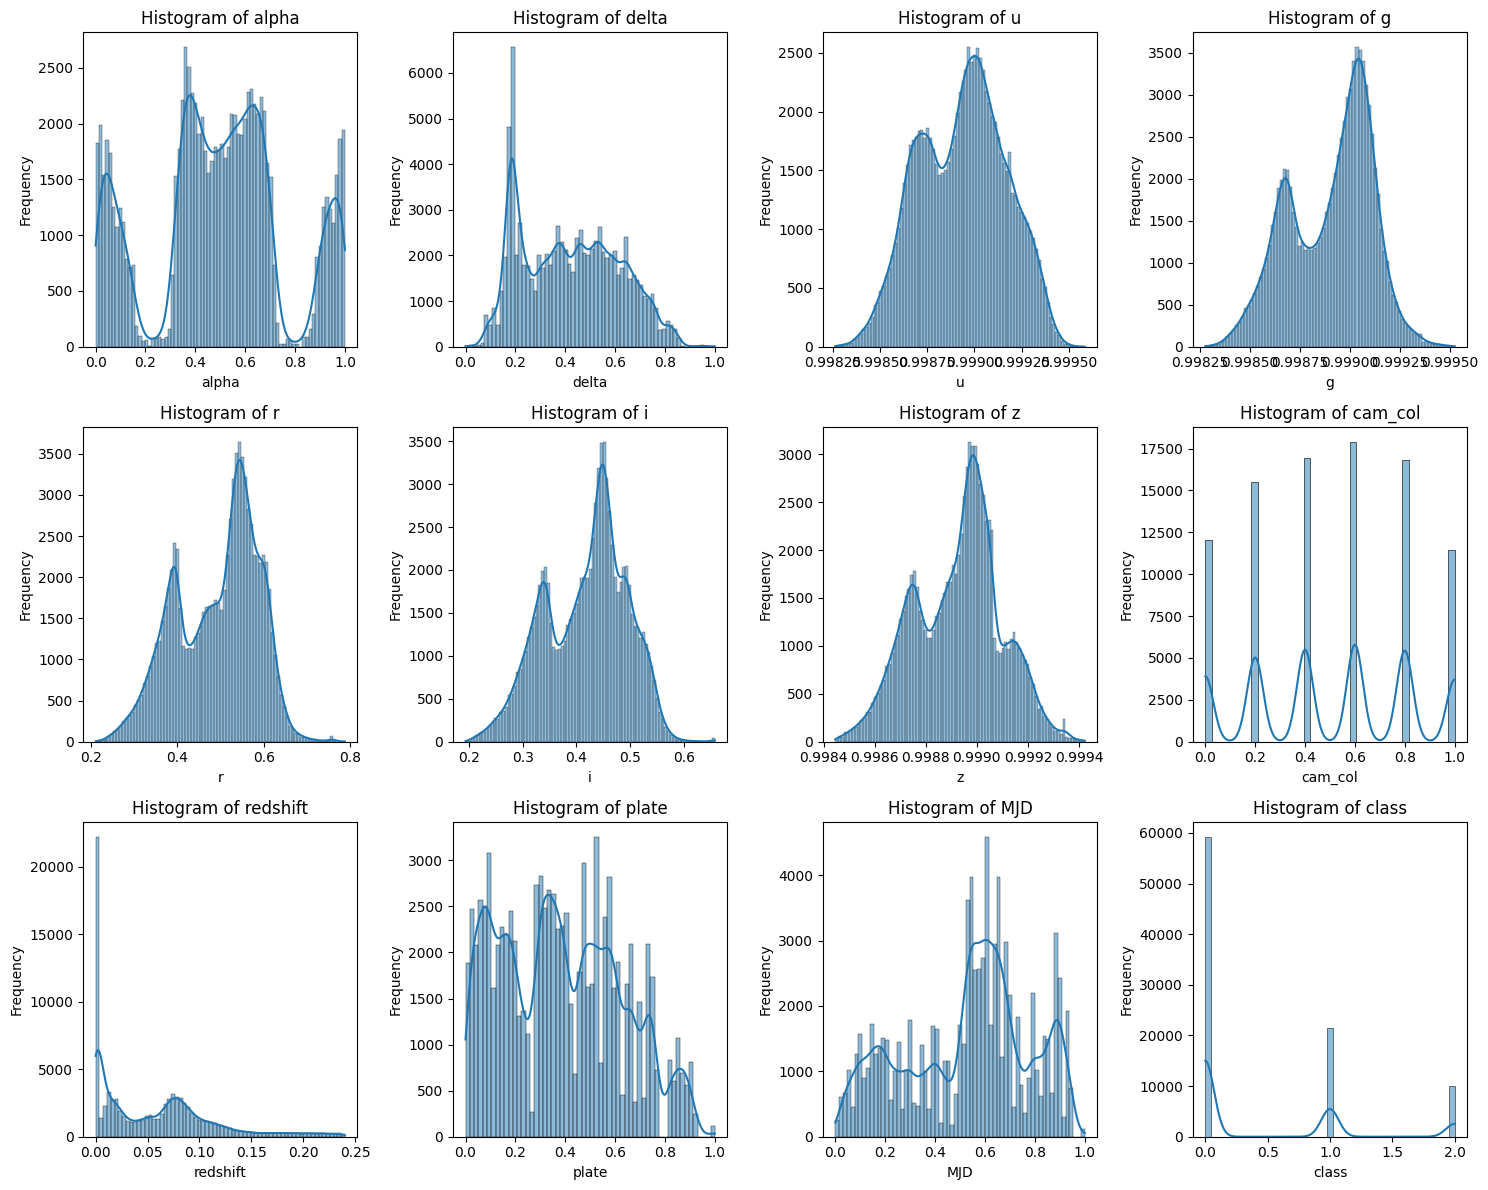

In [81]:
import math

# Select numeric columns from the dataset
numeric_columns = data_clean.select_dtypes(include='number').columns

# Calculate the number of rows needed based on the number of columns
n_cols = 4
n_rows = math.ceil(len(numeric_columns) / n_cols)

# Set up the subplot grid with 3 columns
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, n_rows * 4))

# Flatten axes in case it's a 2D array
axes = axes.flatten()

# Create a histogram for each numeric column
for i, col in enumerate(numeric_columns):
    sns.histplot(data_clean[col], ax=axes[i], kde=True)  # Plot with KDE curve
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Remove empty subplots, if any
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

In [82]:
data_clean.columns

Index(['alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'cam_col', 'redshift',
       'plate', 'MJD', 'class'],
      dtype='object')

### Bivariate Analysis

In [83]:
columns1 = ['alpha', 'delta', 'u', 'g', 'r', 'class']
columns2 = ['i', 'z', 'cam_col', 'redshift', 'plate', 'MJD', 'class']

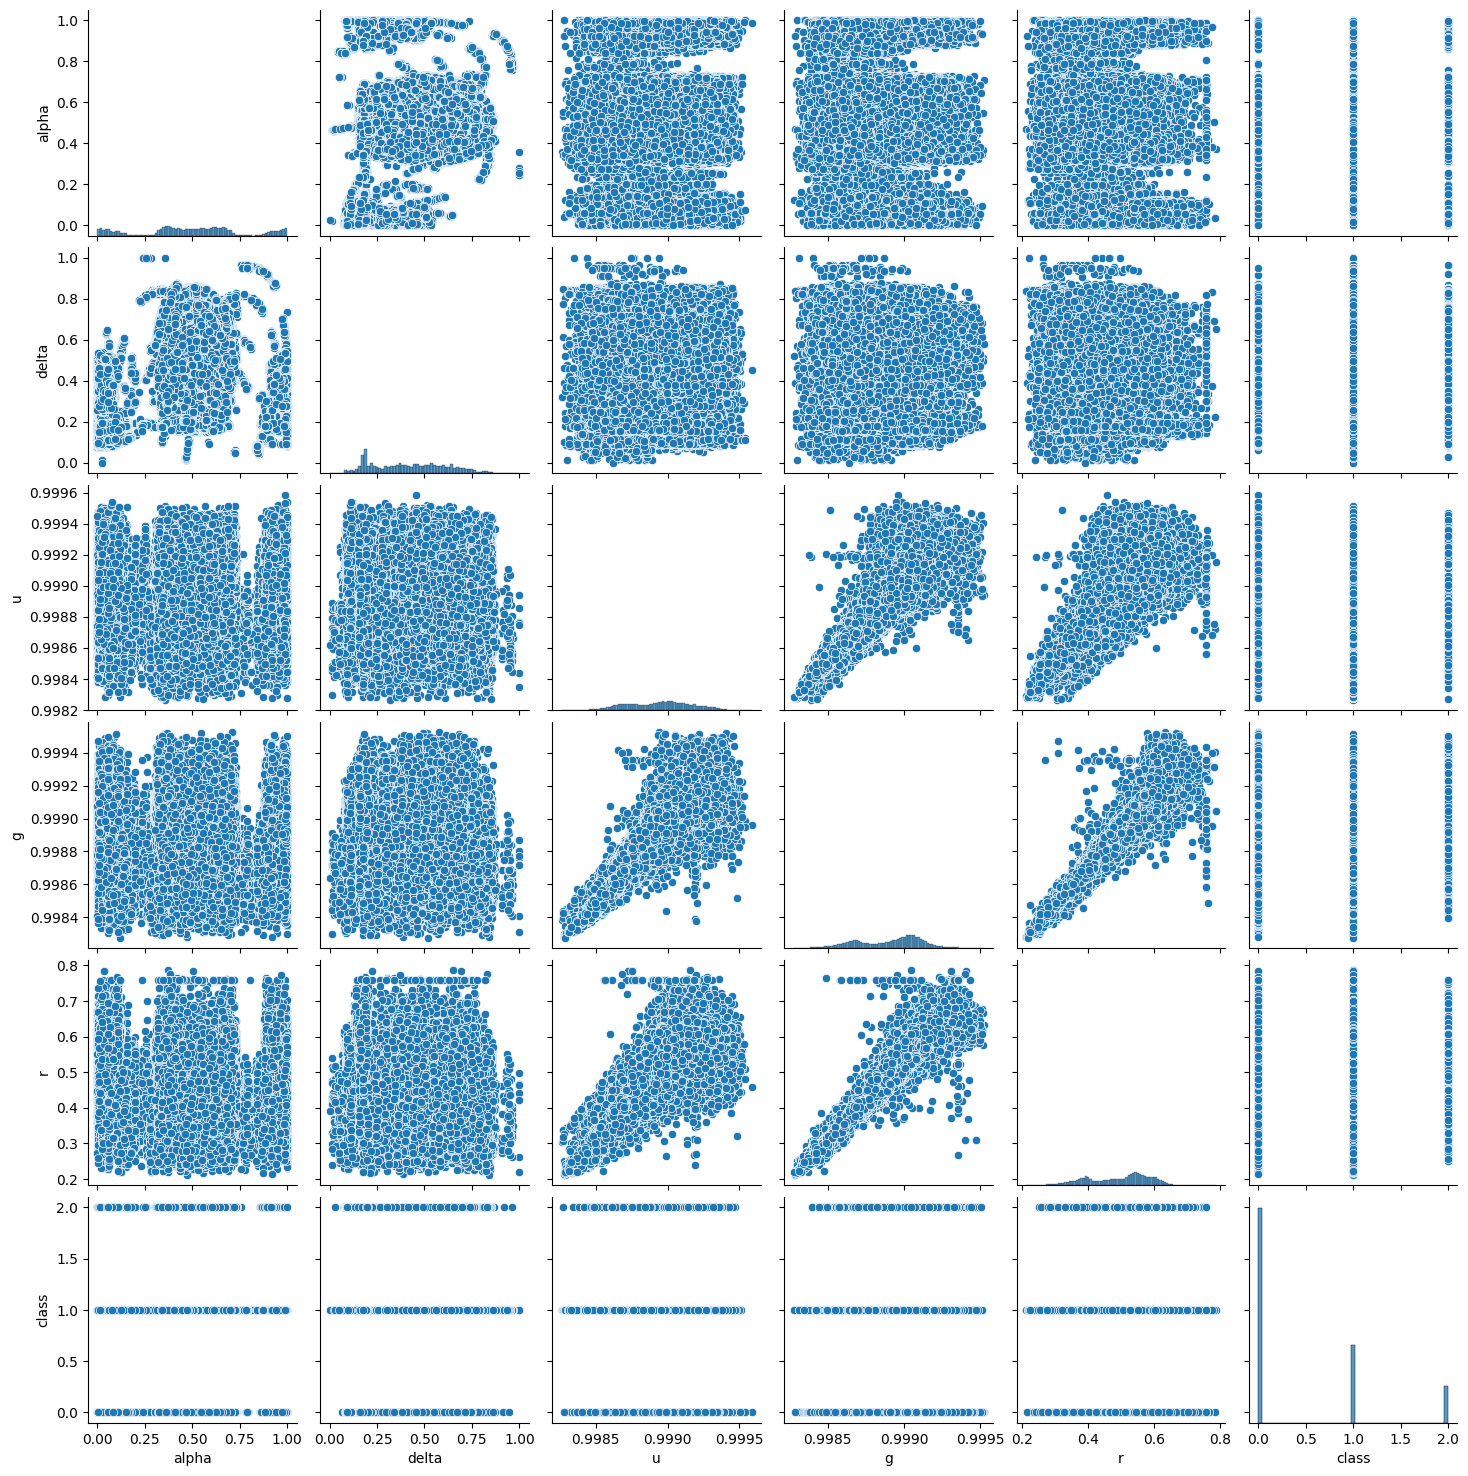

In [84]:
sns.pairplot(data=data_clean[columns1])
plt.show()

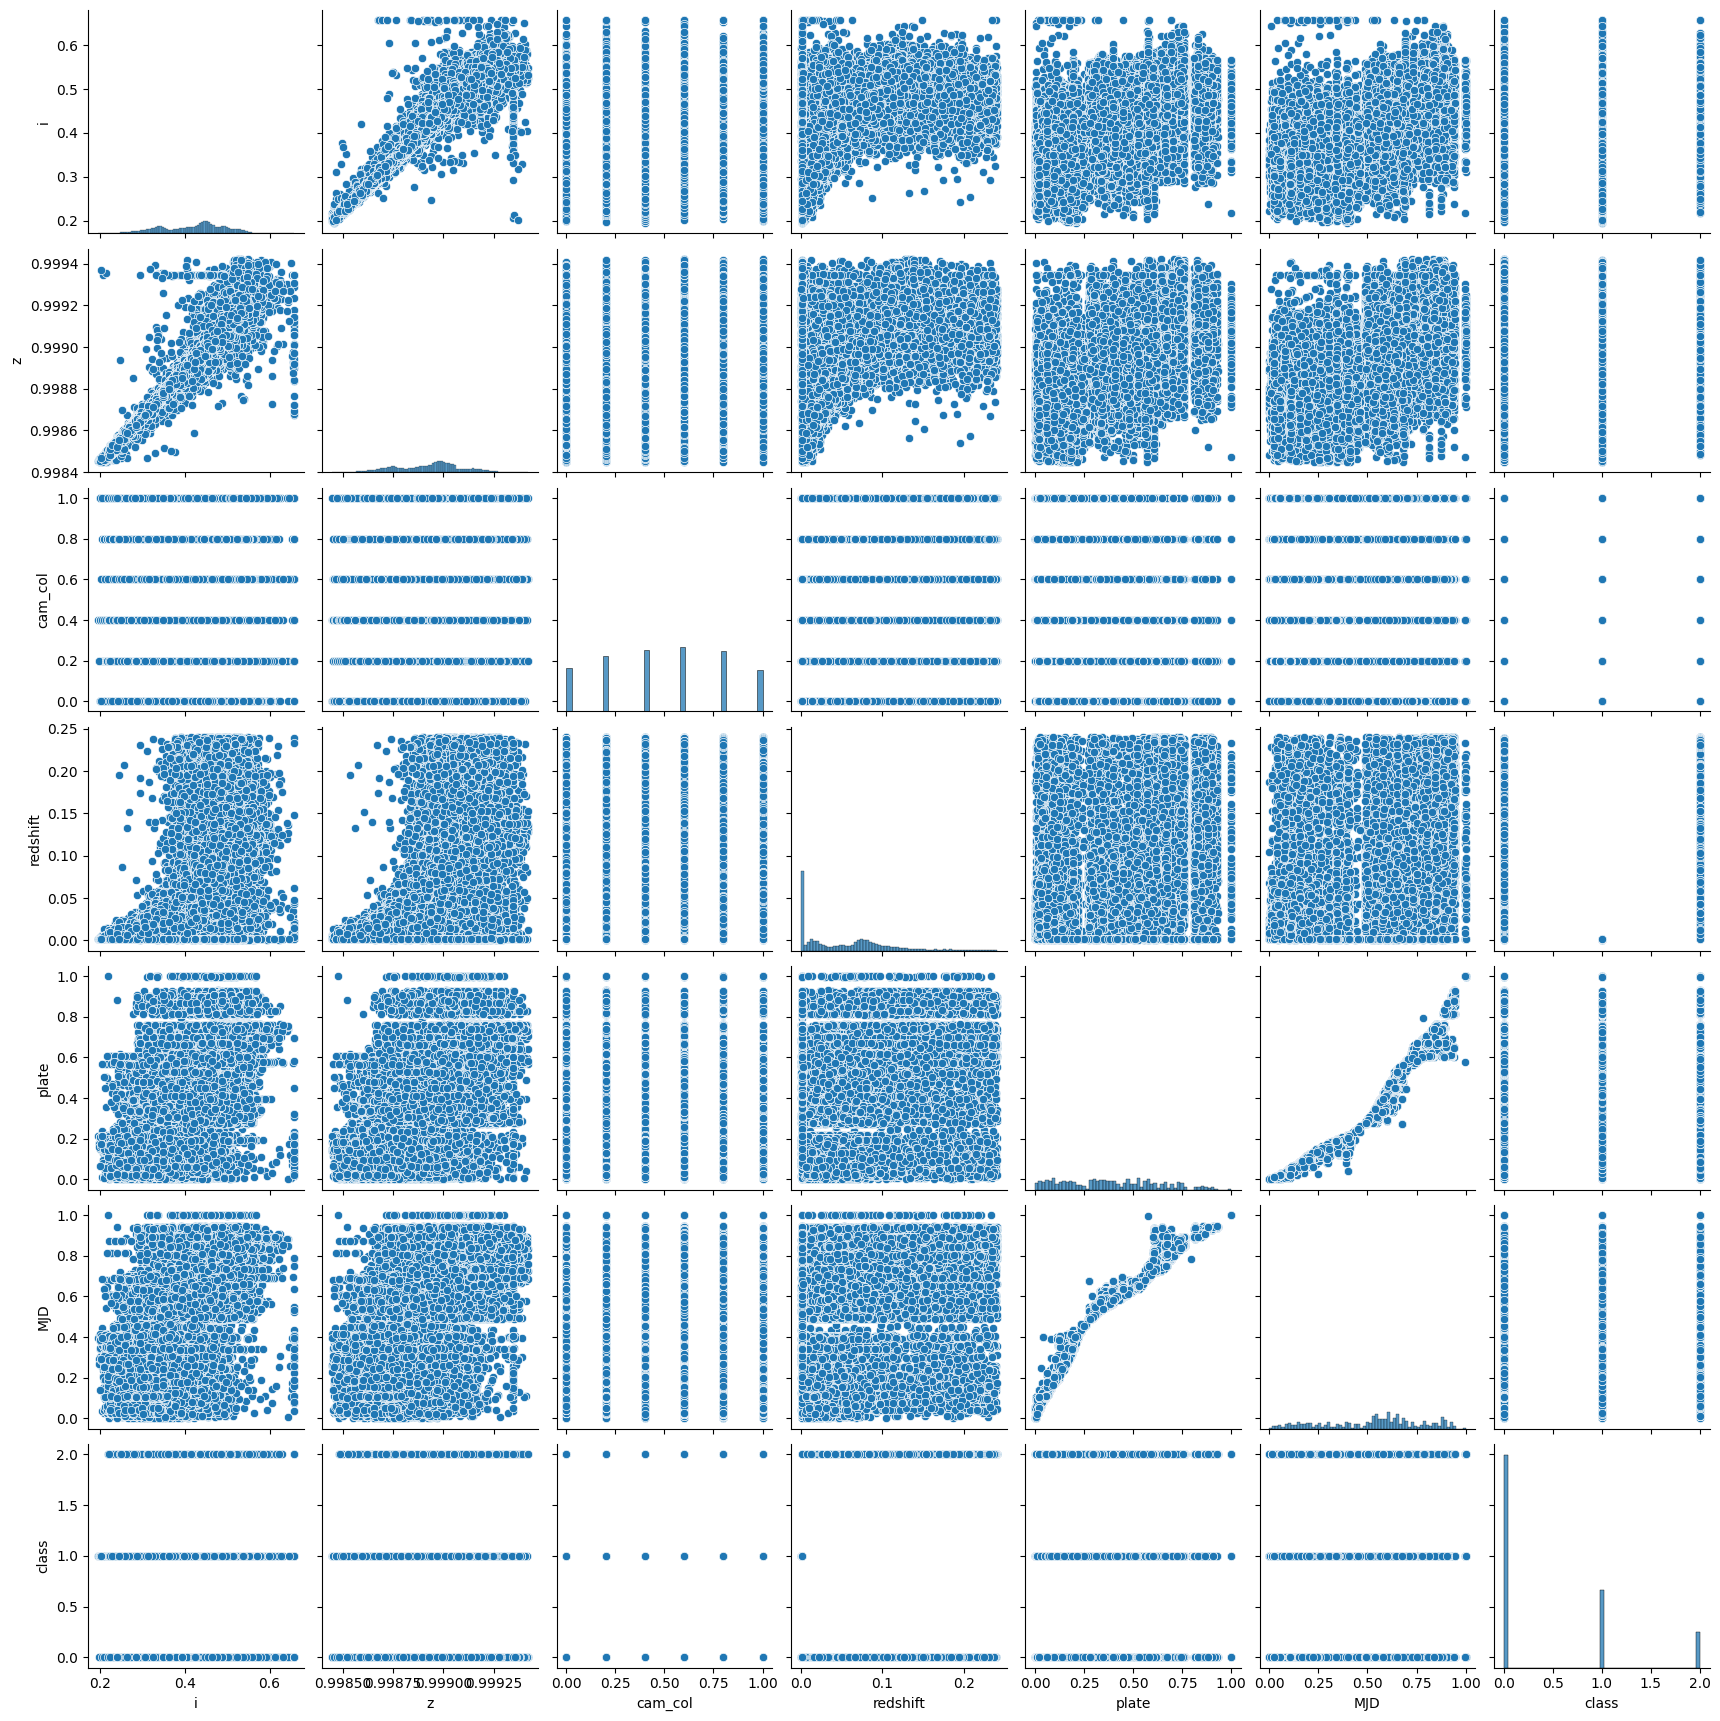

In [85]:
sns.pairplot(data=data_clean[columns2])
plt.show()

In [86]:
data_clean.head()

alpha     delta         u         g         r         i         z  \
0  0.376905  0.503802  0.999113  0.999070  0.535344  0.427665  0.998944   
1  0.402286  0.491812  0.999202  0.999126  0.646203  0.515986  0.999225   
2  0.394960  0.534139  0.999251  0.999109  0.546218  0.435729  0.998959   
3  0.940947  0.180600  0.998939  0.999220  0.596946  0.486717  0.998990   
4  0.959118  0.392679  0.998670  0.998602  0.337999  0.287021  0.998620   

   cam_col  redshift     plate       MJD  class  
0      0.2  0.091831  0.451592  0.648007      0  
1      0.8  0.112389  0.828841  0.894320      0  
2      0.2  0.093170  0.350949  0.543965      0  
3      0.4  0.134210  0.723312  0.878072      0  
4      0.4  0.017959  0.476753  0.625205      0

### Correlation

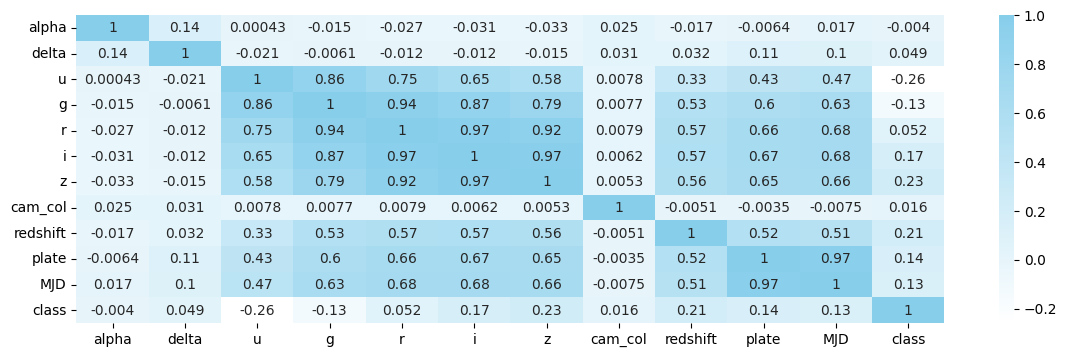

In [87]:
from matplotlib.colors import LinearSegmentedColormap

correl = data_clean.corr()

plt.figure(figsize= (14,4))

# Define a custom single-color colormap
single_color_cmap = LinearSegmentedColormap.from_list("single_color", ["white", "skyblue"])

# Plot the heatmap with the custom colormap
sns.heatmap(correl, cmap=single_color_cmap, annot=True)
plt.show()

# Splitting the Dataset

In [88]:
X = data_clean.drop('class', axis = 1)
y = data_clean['class']
X.head()

alpha     delta         u         g         r         i         z  \
0  0.376905  0.503802  0.999113  0.999070  0.535344  0.427665  0.998944   
1  0.402286  0.491812  0.999202  0.999126  0.646203  0.515986  0.999225   
2  0.394960  0.534139  0.999251  0.999109  0.546218  0.435729  0.998959   
3  0.940947  0.180600  0.998939  0.999220  0.596946  0.486717  0.998990   
4  0.959118  0.392679  0.998670  0.998602  0.337999  0.287021  0.998620   

   cam_col  redshift     plate       MJD  
0      0.2  0.091831  0.451592  0.648007  
1      0.8  0.112389  0.828841  0.894320  
2      0.2  0.093170  0.350949  0.543965  
3      0.4  0.134210  0.723312  0.878072  
4      0.4  0.017959  0.476753  0.625205

In [89]:
y[0:10]

0    0
1    0
2    0
3    0
4    0
5    2
6    2
7    0
8    0
9    1
Name: class, dtype: int64

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state= 42)
X_train.shape, y_train.shape

((67950, 11), (67950,))

# Model Development

### Decision Tree Classifier

In [91]:
model_DT = DecisionTreeClassifier()
model_DT.fit(X_train,y_train)
y_pred_DT = model_DT.predict(X_test)

The Accuracy score for Decision Tree Classifier is 0.96
The Weighted Precision score for Decision Tree Classifier is 0.96
The Weighted Recall score for Decision Tree Classifier is 0.96
The F1 score for Decision Tree Classifier is 0.9588
The Confusion Matrix for Decision Tree Classifier is 
[[14391    20   466]
 [   26  5238     1]
 [  422     1  2085]]
The Classification Report for Decision Tree Classifier is 
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     14877
           1       1.00      0.99      1.00      5265
           2       0.82      0.83      0.82      2508

    accuracy                           0.96     22650
   macro avg       0.93      0.93      0.93     22650
weighted avg       0.96      0.96      0.96     22650


Class-wise Precision and Recall:
Class 0 - Precision: 0.97, Recall: 0.97
Class 1 - Precision: 1.00, Recall: 0.99
Class 2 - Precision: 0.82, Recall: 0.83


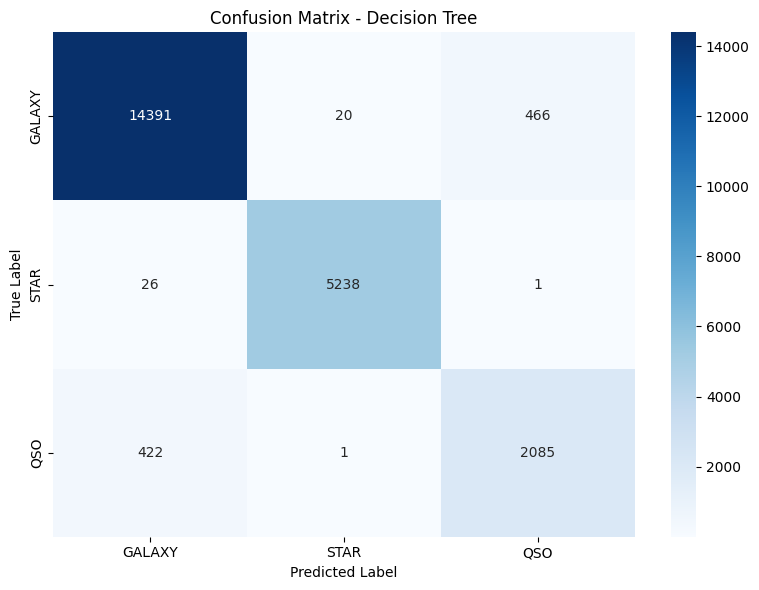

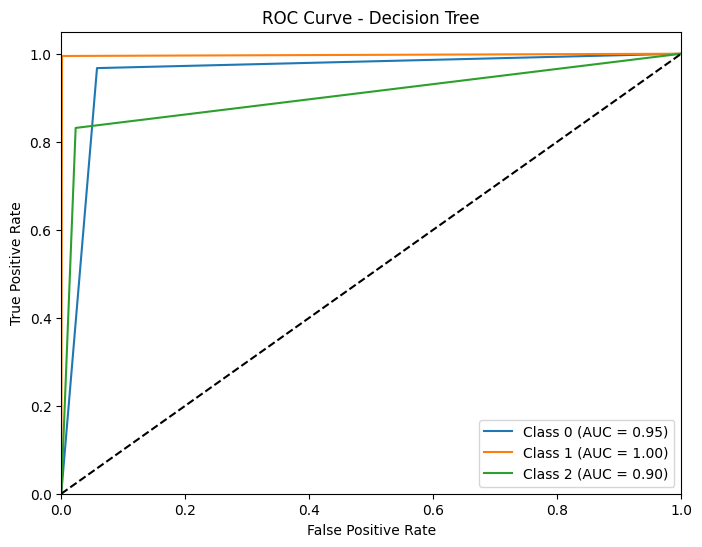

In [92]:
# Decision Tree Evaluation
accuracy_DT = accuracy_score(y_test, y_pred_DT)

# Weighted precision and recall (due to class imbalance)
precision_DT = precision_score(y_test, y_pred_DT, average='weighted')
recall_DT = recall_score(y_test, y_pred_DT, average='weighted')

# Class-wise precision and recall
precision_DT_class = precision_score(y_test, y_pred_DT, average=None)
recall_DT_class = recall_score(y_test, y_pred_DT, average=None)

f1_DT = f1_score(y_test, y_pred_DT, average= 'weighted')
confusion_DT = confusion_matrix(y_test, y_pred_DT)
classi_DT = classification_report(y_test, y_pred_DT)

# Print weighted metrics
print(f"The Accuracy score for Decision Tree Classifier is {accuracy_DT:.2f}")
print(f"The Weighted Precision score for Decision Tree Classifier is {precision_DT:.2f}")
print(f"The Weighted Recall score for Decision Tree Classifier is {recall_DT:.2f}")

# Print confusion matrix, classification report and f1_score
print(f"The F1 score for Decision Tree Classifier is {f1_DT:.4f}")
print(f"The Confusion Matrix for Decision Tree Classifier is \n{confusion_DT}")
print(f"The Classification Report for Decision Tree Classifier is \n{classi_DT}")

# Print class-wise precision and recall
print("\nClass-wise Precision and Recall:")
for idx, class_value in enumerate(set(y_test)):
    print(f"Class {class_value} - Precision: {precision_DT_class[idx]:.2f}, Recall: {recall_DT_class[idx]:.2f}")

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_DT, annot=True, fmt='d', cmap='Blues',
            xticklabels=['GALAXY', 'STAR', 'QSO'],
            yticklabels=['GALAXY', 'STAR', 'QSO'])
plt.title('Confusion Matrix - Decision Tree')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the output for ROC curve
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
y_pred_proba_DT = model_DT.predict_proba(X_test)

# Plot ROC curve
plt.figure(figsize=(8, 6))
for i in range(3):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_proba_DT[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree')
plt.legend(loc="lower right")
plt.show()

### Random Forest Classifier

In [93]:
model_RF = RandomForestClassifier()
model_RF.fit(X_train,y_train)
y_pred_RF = model_DT.predict(X_test)

The Accuracy score for Random Forest Classifier is 0.96
The Weighted Precision score for Random Forest Classifier is 0.96
The Weighted Recall score for Random Forest Classifier is 0.96
The F1 score for Random Forest Classifier is 0.9588
The Confusion Matrix for Random Forest Classifier is 
[[14391    20   466]
 [   26  5238     1]
 [  422     1  2085]]
The Classification Report for Random Forest Classifier is 
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     14877
           1       1.00      0.99      1.00      5265
           2       0.82      0.83      0.82      2508

    accuracy                           0.96     22650
   macro avg       0.93      0.93      0.93     22650
weighted avg       0.96      0.96      0.96     22650


Class-wise Precision and Recall:
Class 0 - Precision: 0.97, Recall: 0.97
Class 1 - Precision: 1.00, Recall: 0.99
Class 2 - Precision: 0.82, Recall: 0.83


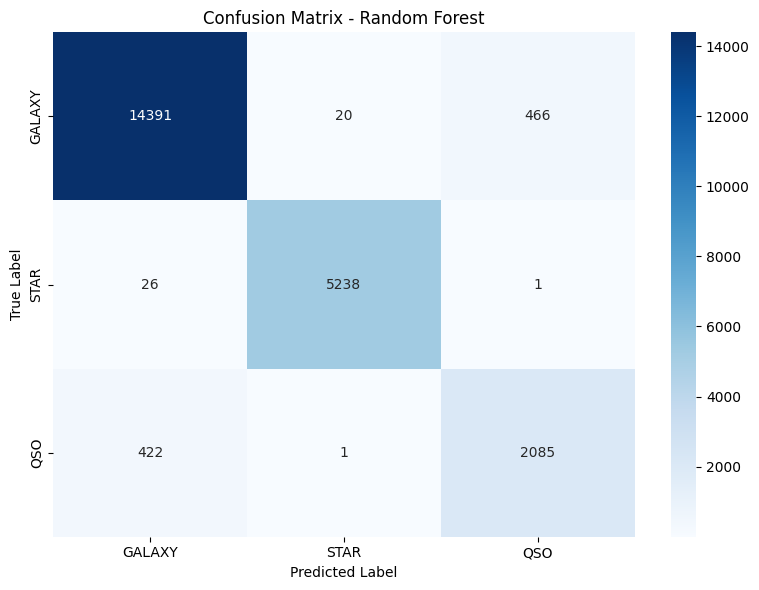

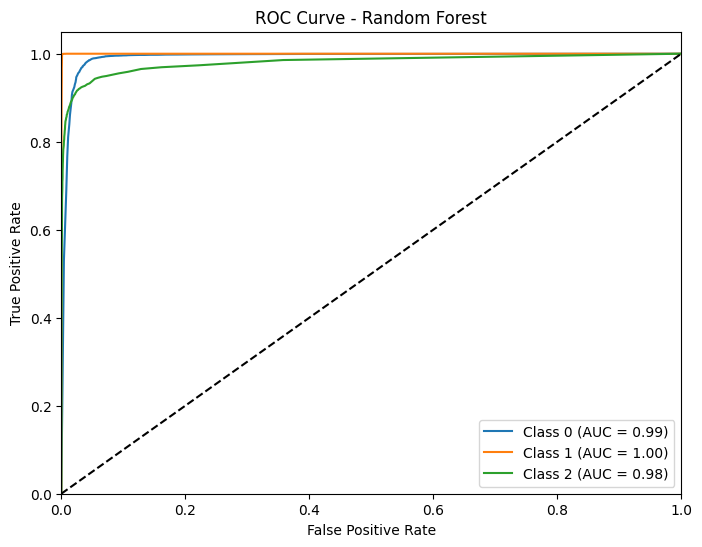

In [ ]:
# Random Forest Evaluation
accuracy_RF = accuracy_score(y_test, y_pred_RF)

# Weighted precision and recall (due to class imbalance)
precision_RF = precision_score(y_test, y_pred_RF, average='weighted')
recall_RF = recall_score(y_test, y_pred_RF, average='weighted')

# Class-wise precision and recall
precision_RF_class = precision_score(y_test, y_pred_RF, average=None)
recall_RF_class = recall_score(y_test, y_pred_RF, average=None)

f1_RF = f1_score(y_test, y_pred_RF, average='weighted')
confusion_RF = confusion_matrix(y_test, y_pred_RF)
classi_RF = classification_report(y_test, y_pred_RF)

# Print weighted metrics
print(f"The Accuracy score for Random Forest Classifier is {accuracy_RF:.2f}")
print(f"The Weighted Precision score for Random Forest Classifier is {precision_RF:.2f}")
print(f"The Weighted Recall score for Random Forest Classifier is {recall_RF:.2f}")

# Print f1_score, confusion matrix and classification report
print(f"The F1 score for Random Forest Classifier is {f1_RF:.4f}")
print(f"The Confusion Matrix for Random Forest Classifier is \n{confusion_RF}")
print(f"The Classification Report for Random Forest Classifier is \n{classi_RF}")

# Print class-wise precision and recall
print("\nClass-wise Precision and Recall:")
for idx, class_value in enumerate(set(y_test)):
    print(f"Class {class_value} - Precision: {precision_RF_class[idx]:.2f}, Recall: {recall_RF_class[idx]:.2f}")

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_RF, annot=True, fmt='d', cmap='Blues',
            xticklabels=['GALAXY', 'STAR', 'QSO'],
            yticklabels=['GALAXY', 'STAR', 'QSO'])
plt.title('Confusion Matrix - Random Forest')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

# Binarize the output for ROC curve
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
y_pred_proba_RF = model_RF.predict_proba(X_test)

# Plot ROC curve
plt.figure(figsize=(8, 6))
for i in range(3):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_proba_RF[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc="lower right")
plt.show()

### K Nearest Neighbours Classifier

In [95]:
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)
y_pred_knn = model_knn.predict(X_test)

The Accuracy score for K Nearest Neighbours Classifier is 0.90
The Weighted Precision score for K Nearest Neighbours Classifier is 0.90
The Weighted Recall score for K Nearest Neighbours Classifier is 0.90
The F1 score for K Nearest Neighbours Classifier is 0.8949
The Confusion Matrix for K Nearest Neighbours Classifier is 
[[14274   460   143]
 [  859  4404     2]
 [  806    45  1657]]
The Classification Report for K Nearest Neighbours Classifier is 
              precision    recall  f1-score   support

           0       0.90      0.96      0.93     14877
           1       0.90      0.84      0.87      5265
           2       0.92      0.66      0.77      2508

    accuracy                           0.90     22650
   macro avg       0.90      0.82      0.85     22650
weighted avg       0.90      0.90      0.89     22650


Class-wise Precision and Recall:
Class 0 - Precision: 0.90, Recall: 0.96
Class 1 - Precision: 0.90, Recall: 0.84
Class 2 - Precision: 0.92, Recall: 0.66


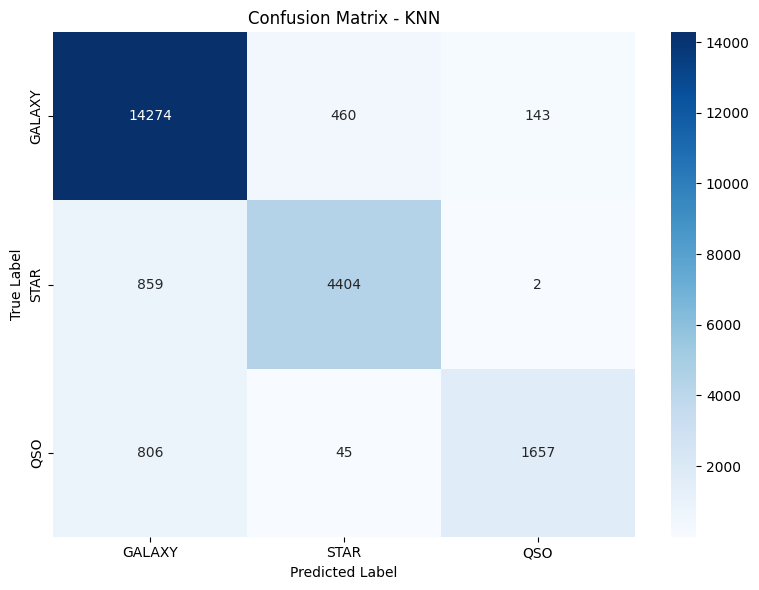

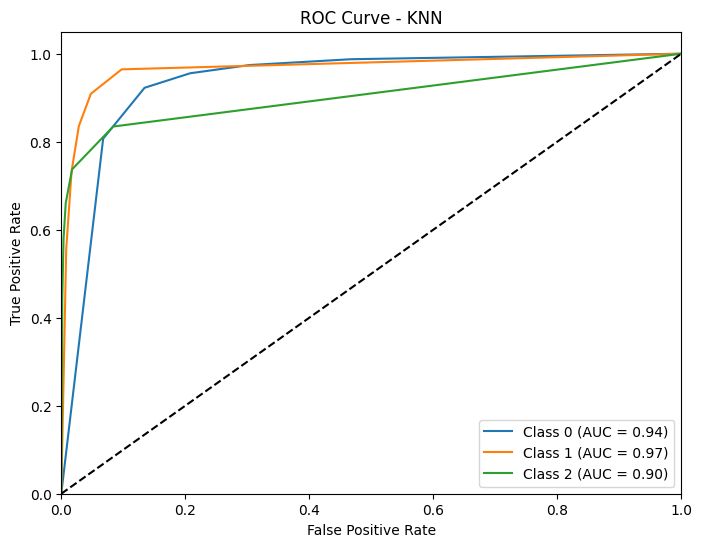

In [ ]:
# KNN Evaluation
accuracy_knn = accuracy_score(y_test, y_pred_knn)

# Weighted precision and recall for overall performance (handles class imbalance)
precision_knn = precision_score(y_test, y_pred_knn, average='weighted')
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')

# Class-wise precision and recall
precision_knn_class = precision_score(y_test, y_pred_knn, average=None)
recall_knn_class = recall_score(y_test, y_pred_knn, average=None)

f1_knn = f1_score(y_test, y_pred_knn, average='weighted')
confusion_knn = confusion_matrix(y_test, y_pred_knn)
classi_knn = classification_report(y_test, y_pred_knn)

# Print weighted metrics
print(f"The Accuracy score for K Nearest Neighbours Classifier is {accuracy_knn:.2f}")
print(f"The Weighted Precision score for K Nearest Neighbours Classifier is {precision_knn:.2f}")
print(f"The Weighted Recall score for K Nearest Neighbours Classifier is {recall_knn:.2f}")

# Print f1_score, confusion matrix and classification report
print(f"The F1 score for K Nearest Neighbours Classifier is {f1_knn:.4f}")
print(f"The Confusion Matrix for K Nearest Neighbours Classifier is \n{confusion_knn}")
print(f"The Classification Report for K Nearest Neighbours Classifier is \n{classi_knn}")

# Print class-wise precision and recall
print("\nClass-wise Precision and Recall:")
for idx, class_value in enumerate(set(y_test)):
    print(f"Class {class_value} - Precision: {precision_knn_class[idx]:.2f}, Recall: {recall_knn_class[idx]:.2f}")

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_knn, annot=True, fmt='d', cmap='Blues',
            xticklabels=['GALAXY', 'STAR', 'QSO'],
            yticklabels=['GALAXY', 'STAR', 'QSO'])
plt.title('Confusion Matrix - KNN')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

# Binarize the output for ROC curve
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
y_pred_proba_knn = model_knn.predict_proba(X_test)

# Plot ROC curve
plt.figure(figsize=(8, 6))
for i in range(3):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_proba_knn[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - KNN')
plt.legend(loc="lower right")
plt.show()

### Support Vector Machine Classifier

In [97]:
model_svc = SVC(kernel='linear')
model_svc.fit(X_train, y_train)
y_pred_svc = model_svc.predict(X_test)

The Accuracy score for Support Vector Machine Classifier is 0.93
The Weighted Precision score for Support Vector Machine Classifier is 0.93
The Weighted Recall score for Support Vector Machine Classifier is 0.93
The F1 score for Support Vector Machines Classifier is 0.9297
The Confusion Matrix for Support Vector Machine Classifier is 
[[14192   507   178]
 [  163  5102     0]
 [  697    11  1800]]
The Classification Report for Support Vector Machine Classifier is 
              precision    recall  f1-score   support

           0       0.94      0.95      0.95     14877
           1       0.91      0.97      0.94      5265
           2       0.91      0.72      0.80      2508

    accuracy                           0.93     22650
   macro avg       0.92      0.88      0.90     22650
weighted avg       0.93      0.93      0.93     22650


Class-wise Precision and Recall:
Class 0 - Precision: 0.94, Recall: 0.95
Class 1 - Precision: 0.91, Recall: 0.97
Class 2 - Precision: 0.91, Recall: 0

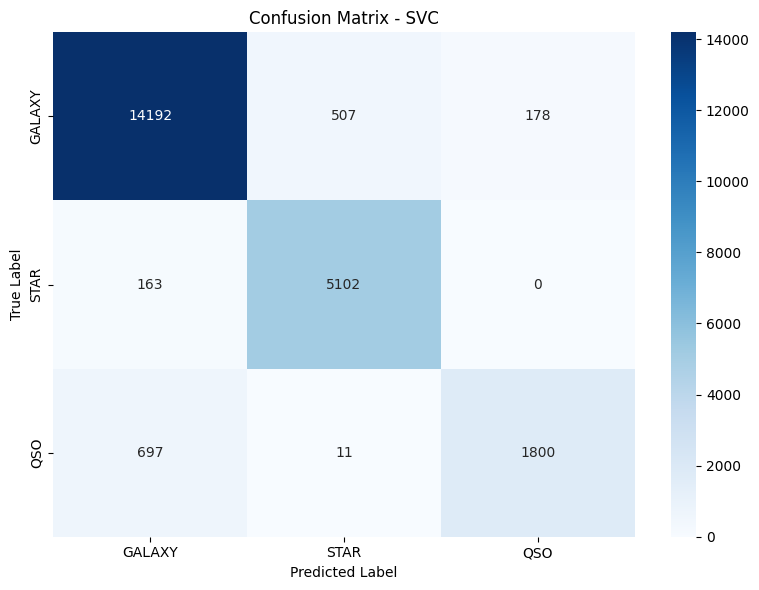

In [ ]:
# SVC Evaluation
accuracy_svc = accuracy_score(y_test, y_pred_svc)

# Weighted precision and recall for overall performance (handles class imbalance)
precision_svc = precision_score(y_test, y_pred_svc, average='weighted')
recall_svc = recall_score(y_test, y_pred_svc, average='weighted')

# Class-wise precision and recall
precision_svc_class = precision_score(y_test, y_pred_svc, average=None)
recall_svc_class = recall_score(y_test, y_pred_svc, average=None)

f1_svc = f1_score(y_test, y_pred_svc, average='weighted')
confusion_svc = confusion_matrix(y_test, y_pred_svc)
classi_svc = classification_report(y_test, y_pred_svc)

# Print weighted metrics
print(f"The Accuracy score for Support Vector Machine Classifier is {accuracy_svc:.2f}")
print(f"The Weighted Precision score for Support Vector Machine Classifier is {precision_svc:.2f}")
print(f"The Weighted Recall score for Support Vector Machine Classifier is {recall_svc:.2f}")

# Print f1_score, confusion matrix and classification report
print(f"The F1 score for Support Vector Machines Classifier is {f1_svc:.4f}")
print(f"The Confusion Matrix for Support Vector Machine Classifier is \n{confusion_svc}")
print(f"The Classification Report for Support Vector Machine Classifier is \n{classi_svc}")

# Print class-wise precision and recall
print("\nClass-wise Precision and Recall:")
for idx, class_value in enumerate(set(y_test)):
    print(f"Class {class_value} - Precision: {precision_svc_class[idx]:.2f}, Recall: {recall_svc_class[idx]:.2f}")

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_svc, annot=True, fmt='d', cmap='Blues',
            xticklabels=['GALAXY', 'STAR', 'QSO'],
            yticklabels=['GALAXY', 'STAR', 'QSO'])
plt.title('Confusion Matrix - SVC')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()


# Binarize the output for ROC curve
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
# For SVC, use decision_function or predict_proba if available
# For kernel='linear', decision_function is generally used
y_score_svc = model_svc.decision_function(X_test)

# Plot ROC curve
plt.figure(figsize=(8, 6))
for i in range(3):
    # Calculate ROC curve for each class
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score_svc[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SVC')
plt.legend(loc="lower right")
plt.show()

### Gradient Boosting Classifier

In [ ]:
model_gb = GradientBoostingClassifier(n_estimators=100, loss='log_loss', random_state=100)
model_gb.fit(X_train, y_train)
y_pred_gb = model_gb.predict(X_test)

The Accuracy score for Gradient Boosting Classifier is 0.97
The Weighted Precision score for Gradient Boosting Classifier is 0.97
The Weighted Recall score for Gradient Boosting Classifier is 0.97
The F1 score for Gradient Boosting Classifier is 0.9732
The Confusion Matrix for Gradient Boosting Classifier is 
[[14685    21   171]
 [    3  5262     0]
 [  399     1  2108]]
The Classification Report for Gradient Boosting Classifier is 
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     14877
           1       1.00      1.00      1.00      5265
           2       0.92      0.84      0.88      2508

    accuracy                           0.97     22650
   macro avg       0.96      0.94      0.95     22650
weighted avg       0.97      0.97      0.97     22650


Class-wise Precision and Recall:
Class 0 - Precision: 0.97, Recall: 0.99
Class 1 - Precision: 1.00, Recall: 1.00
Class 2 - Precision: 0.92, Recall: 0.84


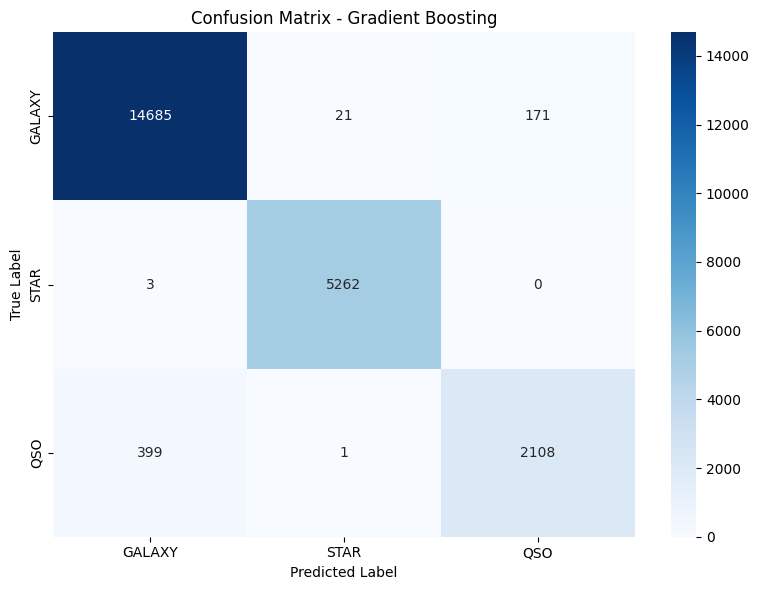

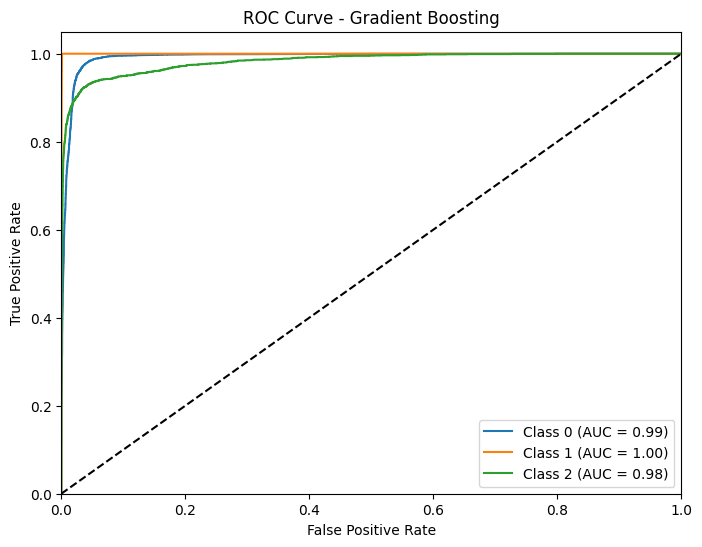

In [ ]:
# Gradient Boosting Evaluation
accuracy_gb = accuracy_score(y_test, y_pred_gb)

# Weighted precision and recall for overall performance (handles class imbalance)
precision_gb = precision_score(y_test, y_pred_gb, average='weighted')
recall_gb = recall_score(y_test, y_pred_gb, average='weighted')

# Class-wise precision and recall
precision_gb_class = precision_score(y_test, y_pred_gb, average=None)
recall_gb_class = recall_score(y_test, y_pred_gb, average=None)

f1_gb = f1_score(y_test, y_pred_gb, average='weighted')
confusion_gb = confusion_matrix(y_test, y_pred_gb)
classi_gb = classification_report(y_test, y_pred_gb)

# Print weighted metrics
print(f"The Accuracy score for Gradient Boosting Classifier is {accuracy_gb:.2f}")
print(f"The Weighted Precision score for Gradient Boosting Classifier is {precision_gb:.2f}")
print(f"The Weighted Recall score for Gradient Boosting Classifier is {recall_gb:.2f}")

# Print f1_score, confusion matrix and classification report
print(f"The F1 score for Gradient Boosting Classifier is {f1_gb:.4f}")
print(f"The Confusion Matrix for Gradient Boosting Classifier is \n{confusion_gb}")
print(f"The Classification Report for Gradient Boosting Classifier is \n{classi_gb}")

# Print class-wise precision and recall
print("\nClass-wise Precision and Recall:")
for idx, class_value in enumerate(set(y_test)):
    print(f"Class {class_value} - Precision: {precision_gb_class[idx]:.2f}, Recall: {recall_gb_class[idx]:.2f}")

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_gb, annot=True, fmt='d', cmap='Blues',
            xticklabels=['GALAXY', 'STAR', 'QSO'],
            yticklabels=['GALAXY', 'STAR', 'QSO'])
plt.title('Confusion Matrix - Gradient Boosting')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

# Binarize the output for ROC curve
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
y_pred_proba_gb = model_gb.predict_proba(X_test)

# Plot ROC curve
plt.figure(figsize=(8, 6))
for i in range(3):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_proba_gb[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Gradient Boosting')
plt.legend(loc="lower right")
plt.show()

### AdaBoosting Classifier

In [ ]:
weaker_learner = DecisionTreeClassifier(max_depth= 1)
model_ab = AdaBoostClassifier(estimator= weaker_learner, n_estimators= 50, learning_rate= 1.0)
model_ab.fit(X_train, y_train)

y_pred_ab = model_ab.predict(X_test)

The Accuracy score for AdaBoosting Classifier is 0.92
The Weighted Precision score for AdaBoosting Classifier is 0.92
The Weighted Recall score for AdaBoosting Classifier is 0.92
The F1 score for AdaBoost Classifier is 0.9176
The Confusion Matrix for AdaBoosting Classifier is 
[[13636   142  1099]
 [    7  5258     0]
 [  669     1  1838]]
The Classification Report for AdaBoosting Classifier is 
              precision    recall  f1-score   support

           0       0.95      0.92      0.93     14877
           1       0.97      1.00      0.99      5265
           2       0.63      0.73      0.68      2508

    accuracy                           0.92     22650
   macro avg       0.85      0.88      0.87     22650
weighted avg       0.92      0.92      0.92     22650


Class-wise Precision and Recall:
Class 0 - Precision: 0.95, Recall: 0.92
Class 1 - Precision: 0.97, Recall: 1.00
Class 2 - Precision: 0.63, Recall: 0.73


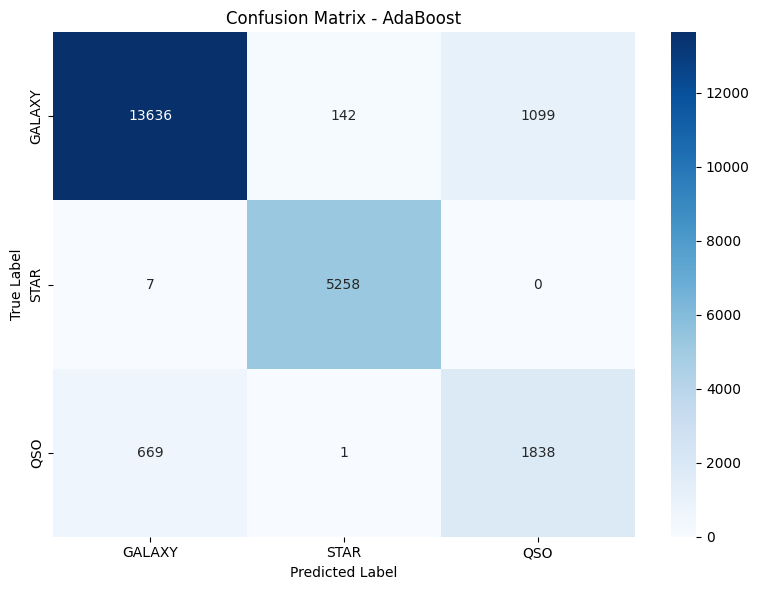

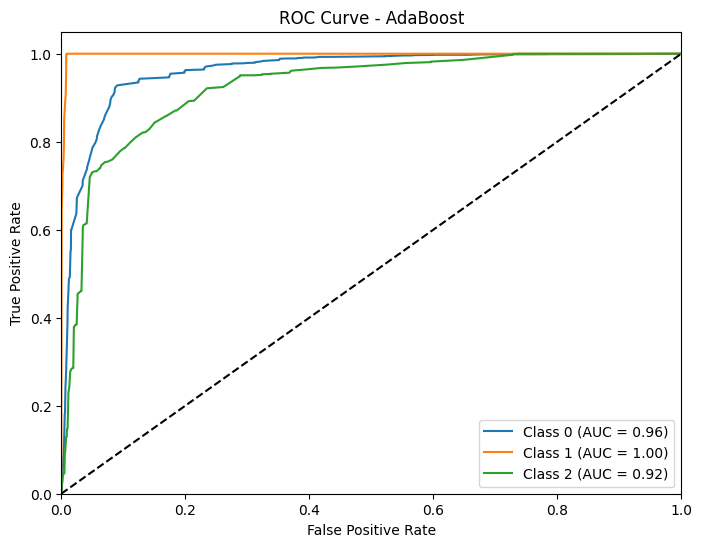

In [ ]:
# AdaBoost Evaluation
accuracy_ab = accuracy_score(y_test, y_pred_ab)

# Retrieve precision and recall for each class
precision_ab_class = precision_score(y_test, y_pred_ab, average=None)
recall_ab_class = recall_score(y_test, y_pred_ab, average=None)

# Calculate weighted precision and recall
precision_ab = precision_score(y_test, y_pred_ab, average='weighted')
recall_ab = recall_score(y_test, y_pred_ab, average='weighted')

f1_ab = f1_score(y_test, y_pred_ab, average='weighted')
confusion_ab = confusion_matrix(y_test, y_pred_ab)
classi_ab = classification_report(y_test, y_pred_ab)

# Print overall accuracy and weighted metrics
print(f"The Accuracy score for AdaBoosting Classifier is {accuracy_ab:.2f}")
print(f"The Weighted Precision score for AdaBoosting Classifier is {precision_ab:.2f}")
print(f"The Weighted Recall score for AdaBoosting Classifier is {recall_ab:.2f}")

# Print f1_score, confusion matrix and classification report
print(f"The F1 score for AdaBoost Classifier is {f1_ab:.4f}")
print(f"The Confusion Matrix for AdaBoosting Classifier is \n{confusion_ab}")
print(f"The Classification Report for AdaBoosting Classifier is \n{classi_ab}")

# Display precision and recall for each class
print("\nClass-wise Precision and Recall:")
for idx, class_value in enumerate(set(y_test)):
    print(f"Class {class_value} - Precision: {precision_ab_class[idx]:.2f}, Recall: {recall_ab_class[idx]:.2f}")

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_ab, annot=True, fmt='d', cmap='Blues',
            xticklabels=['GALAXY', 'STAR', 'QSO'],
            yticklabels=['GALAXY', 'STAR', 'QSO'])
plt.title('Confusion Matrix - AdaBoost')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

# Binarize the output for ROC curve
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
y_pred_proba_ab = model_ab.predict_proba(X_test)

# Plot ROC curve
plt.figure(figsize=(8, 6))
for i in range(3):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_proba_ab[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - AdaBoost')
plt.legend(loc="lower right")
plt.show()

### XGBoost Classifier

In [ ]:
# Initialize XGBoost Classifier
model_xgb = xgb.XGBClassifier()

# Train the model
model_xgb.fit(X_train, y_train)

# Make predictions
y_pred_xgb = model_xgb.predict(X_test)

The Accuracy score for XGBoost Classifier is 0.97
The Weighted Precision score for XGBoost Classifier is 0.97
The Weighted Recall score for XGBoost Classifier is 0.97
The F1 score for XGBoost Classifier is 0.9732
The Confusion Matrix for XGBoost Classifier is 
[[14641    41   195]
 [   19  5246     0]
 [  344     1  2163]]
The Classification Report for XGBoost Classifier is 
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     14877
           1       0.99      1.00      0.99      5265
           2       0.92      0.86      0.89      2508

    accuracy                           0.97     22650
   macro avg       0.96      0.95      0.95     22650
weighted avg       0.97      0.97      0.97     22650


Class-wise Precision and Recall:
Class 0 - Precision: 0.98, Recall: 0.98
Class 1 - Precision: 0.99, Recall: 1.00
Class 2 - Precision: 0.92, Recall: 0.86


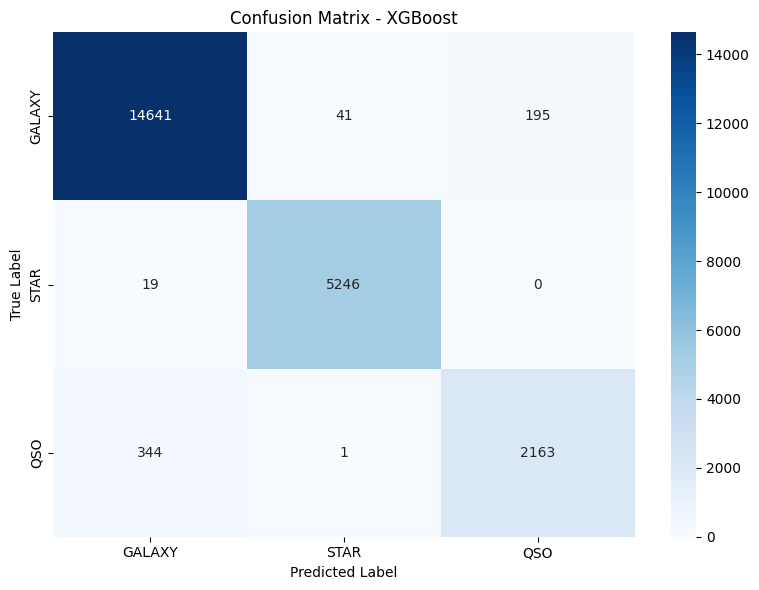

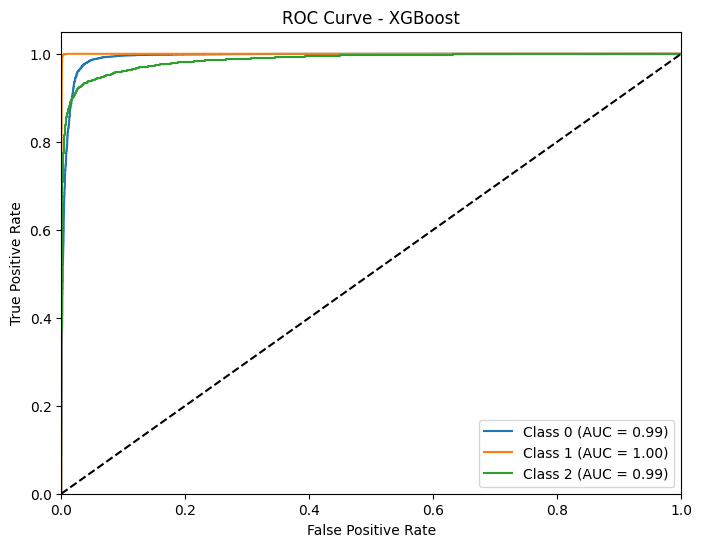

In [ ]:
# Accuracy score for XGBoost
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)

# Precision score with 'weighted' average for multiclass classification
precision_xgb = precision_score(y_test, y_pred_xgb, average='weighted')

# Recall score with 'weighted' average for multiclass classification
recall_xgb = recall_score(y_test, y_pred_xgb, average='weighted')

# Retrieve precision and recall for each class
precision_xgb_class = precision_score(y_test, y_pred_xgb, average=None)
recall_xgb_class = recall_score(y_test, y_pred_xgb, average=None)

f1_xgb = f1_score(y_test, y_pred_xgb, average='weighted')



# Confusion matrix for XGBoost
confusion_xgb = confusion_matrix(y_test, y_pred_xgb)

# Classification report for XGBoost (which includes precision, recall, f1-score for each class)
classi_xgb = classification_report(y_test, y_pred_xgb)

# Print the results
print(f"The Accuracy score for XGBoost Classifier is {accuracy_xgb:.2f}")
print(f"The Weighted Precision score for XGBoost Classifier is {precision_xgb:.2f}")
print(f"The Weighted Recall score for XGBoost Classifier is {recall_xgb:.2f}")
print(f"The F1 score for XGBoost Classifier is {f1_xgb:.4f}")
print(f"The Confusion Matrix for XGBoost Classifier is \n{confusion_xgb}")
print(f"The Classification Report for XGBoost Classifier is \n{classi_xgb}")

# Display precision and recall for each class
print("\nClass-wise Precision and Recall:")
for idx, class_value in enumerate(set(y_test)):
    print(f"Class {class_value} - Precision: {precision_xgb_class[idx]:.2f}, Recall: {recall_xgb_class[idx]:.2f}")

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_xgb, annot=True, fmt='d', cmap='Blues',
            xticklabels=['GALAXY', 'STAR', 'QSO'],
            yticklabels=['GALAXY', 'STAR', 'QSO'])
plt.title('Confusion Matrix - XGBoost')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

# Binarize the output for ROC curve
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
y_pred_proba_xgb = model_xgb.predict_proba(X_test)

# Plot ROC curve
plt.figure(figsize=(8, 6))
for i in range(3):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_proba_xgb[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGBoost')
plt.legend(loc="lower right")
plt.show()

## Model Comparision

In [ ]:
#Creating a dataframe with all the models with respect to all evaluation metrics
Model_compare = pd.DataFrame({
    'Models': ['Desicion Tree', 'Random Forest', 'K Nearest Neigbhours', 'Support Vector Machines', 'Gradient Boosting', 'AdaBoost', 'XGBoost'],
    'Accuracy' : [accuracy_DT, accuracy_RF, accuracy_knn, accuracy_svc, accuracy_gb, accuracy_ab, accuracy_xgb],
    'Precision' : [precision_DT, precision_RF, precision_knn, precision_svc, precision_gb, precision_ab, precision_xgb],
    'Recall' : [recall_DT, recall_RF, recall_knn, recall_svc, recall_gb, recall_ab, recall_xgb],
    'F1_score' : [  f1_DT, f1_RF, f1_knn, f1_svc, f1_gb, f1_ab, f1_xgb]
})

#Displaying the dataframe
Model_compare.head(7)

Models  Accuracy  Precision    Recall  F1_score
0            Desicion Tree  0.959249   0.959433  0.959249  0.959338
1            Random Forest  0.959249   0.959433  0.959249  0.959338
2     K Nearest Neigbhours  0.897792   0.898565  0.897792  0.894861
3  Support Vector Machines  0.931302   0.931083  0.931302  0.929681
4        Gradient Boosting  0.973731   0.973223  0.973731  0.973221
5                 AdaBoost  0.915320   0.921388  0.915320  0.917620
6                  XGBoost  0.973510   0.973106  0.973510  0.973202

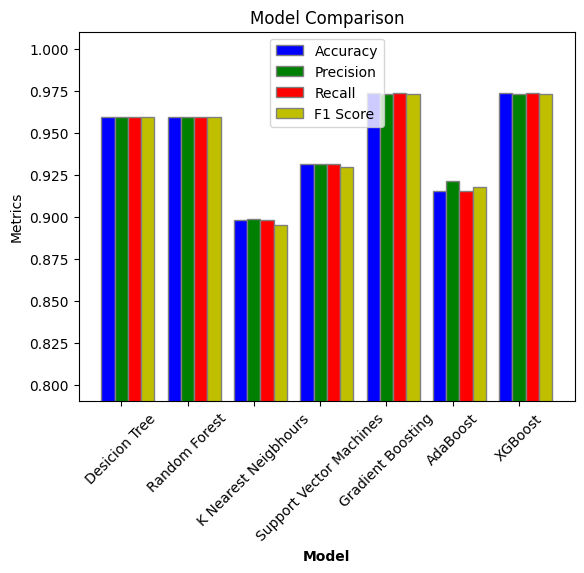

In [ ]:
#ploting all the models Evaluation metrics

# Number of models
n_models = len(Model_compare['Models'])

# Setting the positions and width for the bars
bar_width = 0.2
r1 = np.arange(n_models)
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

# Plotting the bars
plt.bar(r1, Model_compare['Accuracy'], color='b', width=bar_width, edgecolor='grey', label='Accuracy')
plt.bar(r2, Model_compare['Precision'], color='g', width=bar_width, edgecolor='grey', label='Precision')
plt.bar(r3, Model_compare['Recall'], color='r', width=bar_width, edgecolor='grey', label='Recall')
plt.bar(r4, Model_compare['F1_score'], color = 'y', width=bar_width, edgecolor = 'grey', label = 'F1 Score')

# Adding the xticks
plt.xlabel('Model', fontweight='bold')
plt.xticks([r + bar_width for r in range(n_models)], Model_compare['Models'])

# Adding labels and title
plt.ylabel('Metrics')
plt.title('Model Comparison')
plt.legend()
plt.xticks(rotation=45)

# Set y-axis limits
plt.ylim(0.79, 1.01)

# Show the plot
plt.show()

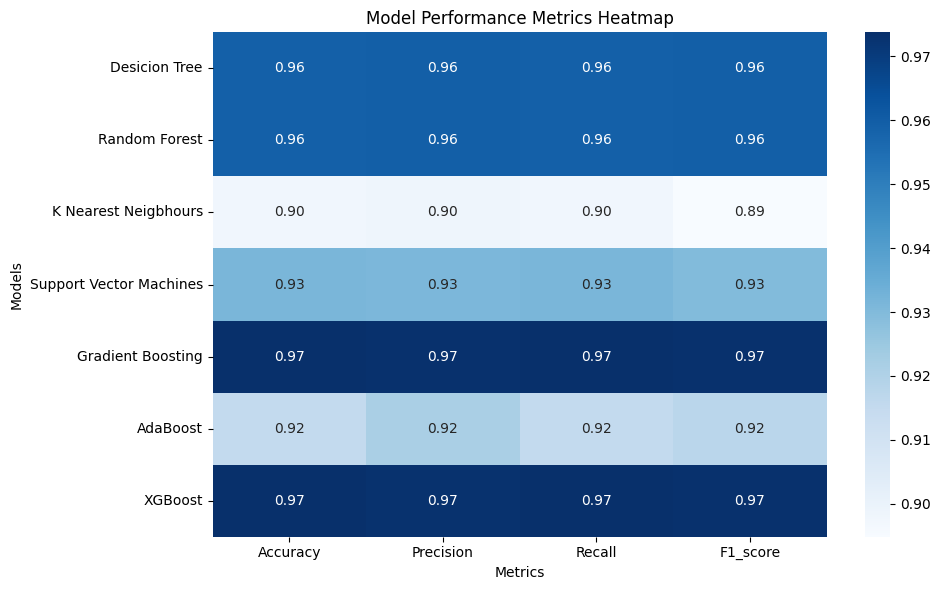

In [ ]:
# Create a heatmap of the model comparison DataFrame
plt.figure(figsize=(10, 6))
sns.heatmap(Model_compare.set_index('Models'), annot=True, cmap='Blues', fmt=".2f")
plt.title('Model Performance Metrics Heatmap')
plt.ylabel('Models')
plt.xlabel('Metrics')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


### 7. Simple Neural Network (Multi-Layer Perceptron)

We implement a Multi-Layer Perceptron (MLP), a feedforward neural network to classify celestial objects using the preprocessed SDSS data. The architecture consists of two hidden
layers with ReLU activation, batch normalization, and dropout regularization to prevent overfitting. The output layer uses softmax activation to handle multi-class classification. We train the model using the Adam optimizer and categorical cross-entropy loss, with early stopping enabled to preserve the best-performing weights. After training, the model's performance is evaluated using standard classification metrics, confusion matrix, and ROC curves. This provides a deep learning perspective to compare against traditional machine learning models in the classification task.


SIMPLE NEURAL NETWORK (MLP)
Training Neural Network...
Epoch 1/50
1062/1062 ━━━━━━━━━━━━━━━━━━━━ 117s 105ms/step - accuracy: 0.6633 - loss: 0.7457 - val_accuracy: 0.6417 - val_loss: 1.3959
Epoch 2/50
1062/1062 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.9130 - loss: 0.2659 - val_accuracy: 0.8306 - val_loss: 0.6211
Epoch 3/50
1062/1062 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9375 - loss: 0.2027 - val_accuracy: 0.7859 - val_loss: 0.8770
Epoch 4/50
1062/1062 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9438 - loss: 0.1868 - val_accuracy: 0.8671 - val_loss: 0.5991
Epoch 5/50
1062/1062 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9496 - loss: 0.1687 - val_accuracy: 0.8646 - val_loss: 0.6811
Epoch 6/50
1062/1062 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9515 - loss: 0.1621 - val_accuracy: 0.8491 - val_loss: 0.3885
Epoch 7/50
1062/1062 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9529 - loss: 0.1560 - val_accuracy: 0.8912 - val_loss: 0.4337
Epoch 8/50
1062/1062 ━━━━━━━━

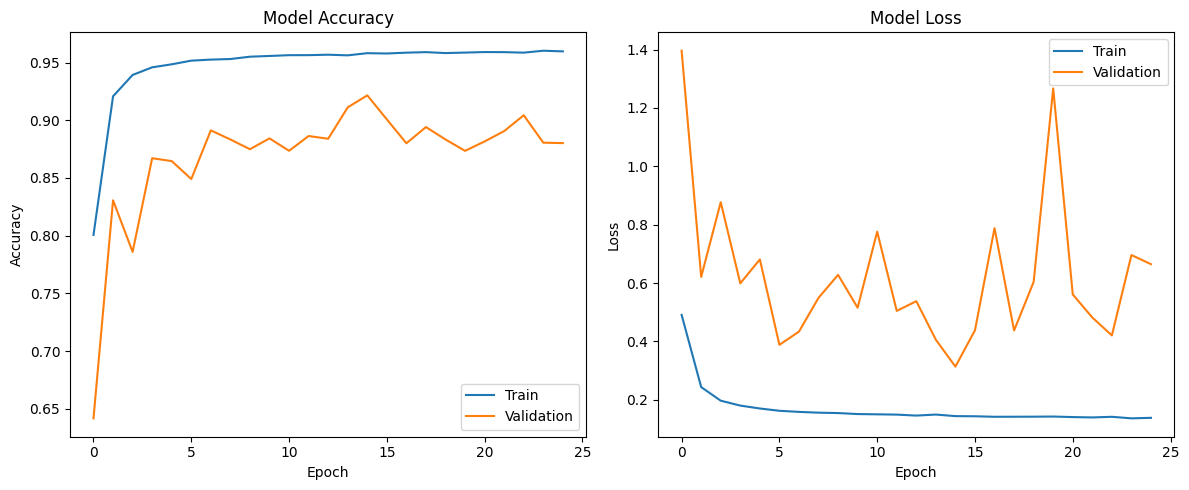

708/708 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step

Neural Network Performance Metrics:
Accuracy: 0.9215
Precision: 0.9256
Recall: 0.9215
F1 Score: 0.9095
Prediction Time: 5.27 seconds

Classification Report:
              precision    recall  f1-score   support

      GALAXY       0.91      0.98      0.94     14877
        STAR       0.95      1.00      0.97      5265
         QSO       0.98      0.41      0.58      2508

    accuracy                           0.92     22650
   macro avg       0.95      0.80      0.83     22650
weighted avg       0.93      0.92      0.91     22650



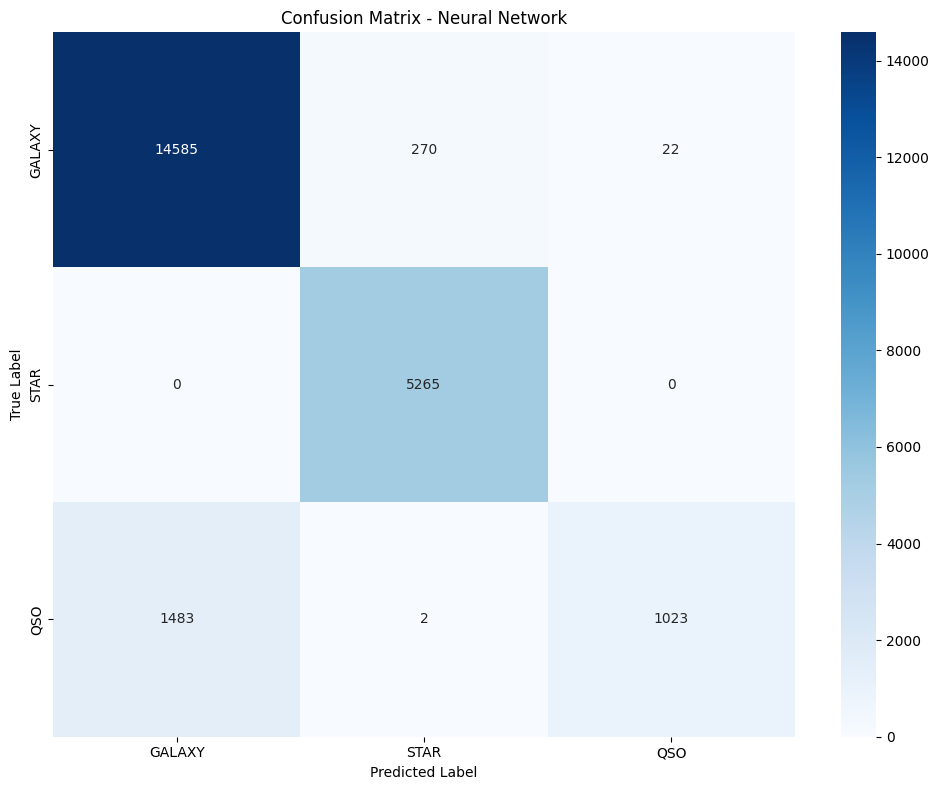

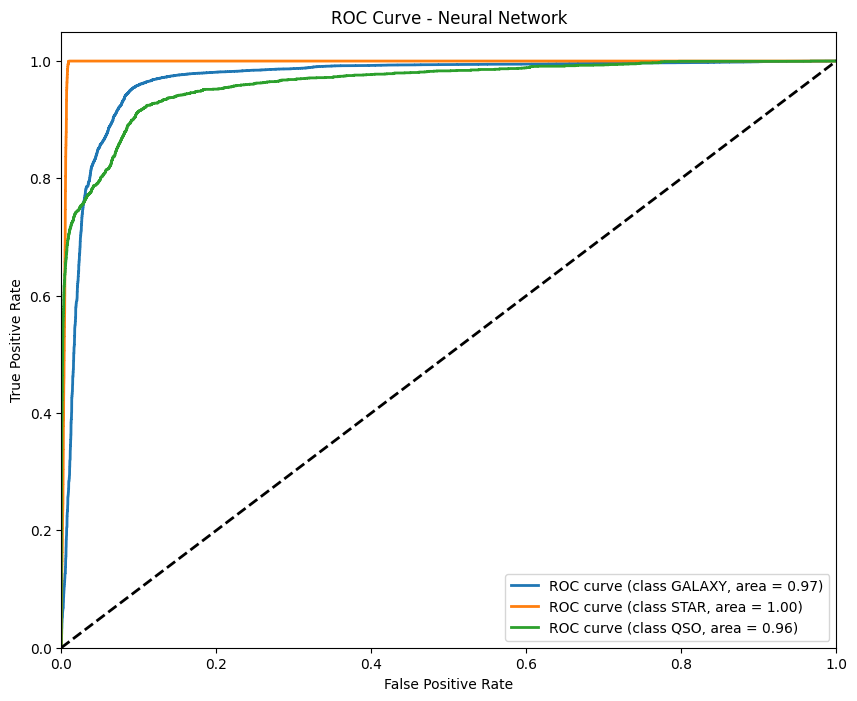

In [ ]:
import time
from sklearn.preprocessing import label_binarize
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

# 3. Neural Network - Simple MLP
print("\n" + "="*50)
print("SIMPLE NEURAL NETWORK (MLP)")
print("="*50)

# Dictionary to store results
results = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': [],
    'Training Time': []
}

# Define number of classes
n_classes = len(data_clean['class'].unique())

# Convert target to categorical for Keras
y_train_cat = to_categorical(y_train, num_classes=n_classes)
y_test_cat = to_categorical(y_test, num_classes=n_classes)

# Create a function to build the model
def create_mlp_model(optimizer='adam', learning_rate=0.001, neurons1=64, neurons2=32, dropout_rate=0.2):
    # Get the input shape
    input_dim = X_train.shape[1]

    # Create model
    model = Sequential([
        Dense(neurons1, input_dim=input_dim, activation='relu'),
        BatchNormalization(),
        Dropout(dropout_rate),
        Dense(neurons2, activation='relu'),
        BatchNormalization(),
        Dropout(dropout_rate),
        Dense(n_classes, activation='softmax')
    ])

    # Compile model
    model.compile(
        loss='categorical_crossentropy',
        optimizer=Adam(learning_rate=learning_rate),
        metrics=['accuracy']
    )
    return model

# Create and train the model
mlp_model = create_mlp_model()

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

print("Training Neural Network...")
# Use test data for validation as there's no separate validation set
history = mlp_model.fit(
    X_train, y_train_cat,
    epochs=50,
    batch_size=64,
    validation_data=(X_test, y_test_cat),
    callbacks=[early_stopping],
    verbose=1
)

# Plot training history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.tight_layout()
plt.show()

# Evaluate the neural network
start_time = time.time()
y_pred_proba = mlp_model.predict(X_test)
y_pred = np.argmax(y_pred_proba, axis=1)
y_test_labels = np.argmax(y_test_cat, axis=1)

nn_acc = accuracy_score(y_test_labels, y_pred)
nn_prec = precision_score(y_test_labels, y_pred, average='weighted')
nn_rec = recall_score(y_test_labels, y_pred, average='weighted')
nn_f1 = f1_score(y_test_labels, y_pred, average='weighted')

nn_time = time.time() - start_time


print("\nNeural Network Performance Metrics:")
print(f"Accuracy: {nn_acc:.4f}")
print(f"Precision: {nn_prec:.4f}")
print(f"Recall: {nn_rec:.4f}")
print(f"F1 Score: {nn_f1:.4f}")
print(f"Prediction Time: {nn_time:.2f} seconds")

# Print classification report
print("\nClassification Report:")
# Assuming the classes are 0, 1, 2 corresponding to GALAXY, STAR, QSO
target_names = ['GALAXY', 'STAR', 'QSO']
print(classification_report(y_test_labels, y_pred, target_names=target_names))

# Plot confusion matrix
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test_labels, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names,
            yticklabels=target_names)
plt.title('Confusion Matrix - Neural Network')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

# Plot ROC curve (one vs rest)
plt.figure(figsize=(10, 8))

for i in range(n_classes):
    # Calculate ROC curve for each class
    fpr, tpr, _ = roc_curve((y_test_labels == i).astype(int), y_pred_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2,
             label=f'ROC curve (class {target_names[i]}, area = {roc_auc:.2f})')


plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Neural Network')
plt.legend(loc="lower right")
plt.show()

# Append Neural Network metrics to the Model_compare DataFrame
nn_results = pd.DataFrame({
    'Models': ['Neural Network'],
    'Accuracy': [nn_acc],
    'Precision': [nn_prec],
    'Recall': [nn_rec],
    'F1_score': [nn_f1]
})

Model_compare = pd.concat([Model_compare, nn_results], ignore_index=True)

In [ ]:
import os
# Defining a list to store evaluation results for each model
all_model_results = []

# --- Decision Tree Results ---
accuracy_DT = accuracy_score(y_test, y_pred_DT)
precision_DT = precision_score(y_test, y_pred_DT, average='weighted')
recall_DT = recall_score(y_test, y_pred_DT, average='weighted')
f1_DT = f1_score(y_test, y_pred_DT, average='weighted')
all_model_results.append({
    'Model': 'Decision Tree',
    'Accuracy': accuracy_DT,
    'Precision': precision_DT,
    'Recall': recall_DT,
    'F1 Score': f1_DT
})

# --- Random Forest Results ---
accuracy_RF = accuracy_score(y_test, y_pred_RF)
precision_RF = precision_score(y_test, y_pred_RF, average='weighted')
recall_RF = recall_score(y_test, y_pred_RF, average='weighted')
f1_RF = f1_score(y_test, y_pred_RF, average='weighted')
all_model_results.append({
    'Model': 'Random Forest',
    'Accuracy': accuracy_RF,
    'Precision': precision_RF,
    'Recall': recall_RF,
    'F1 Score': f1_RF
})

# --- KNN Results ---
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, average='weighted')
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')
all_model_results.append({
    'Model': 'K Nearest Neighbours',
    'Accuracy': accuracy_knn,
    'Precision': precision_knn,
    'Recall': recall_knn,
    'F1 Score': f1_knn
})

# --- SVC Results ---
accuracy_svc = accuracy_score(y_test, y_pred_svc)
precision_svc = precision_score(y_test, y_pred_svc, average='weighted')
recall_svc = recall_score(y_test, y_pred_svc, average='weighted')
f1_svc = f1_score(y_test, y_pred_svc, average='weighted')
all_model_results.append({
    'Model': 'Support Vector Machines',
    'Accuracy': accuracy_svc,
    'Precision': precision_svc,
    'Recall': recall_svc,
    'F1 Score': f1_svc
})

# --- Gradient Boosting Results ---
accuracy_gb = accuracy_score(y_test, y_pred_gb)
precision_gb = precision_score(y_test, y_pred_gb, average='weighted')
recall_gb = recall_score(y_test, y_pred_gb, average='weighted')
f1_gb = f1_score(y_test, y_pred_gb, average='weighted')
all_model_results.append({
    'Model': 'Gradient Boosting',
    'Accuracy': accuracy_gb,
    'Precision': precision_gb,
    'Recall': recall_gb,
    'F1 Score': f1_gb
})

# --- AdaBoost Results ---
accuracy_ab = accuracy_score(y_test, y_pred_ab)
precision_ab = precision_score(y_test, y_pred_ab, average='weighted')
recall_ab = recall_score(y_test, y_pred_ab, average='weighted')
f1_ab = f1_score(y_test, y_pred_ab, average='weighted')
all_model_results.append({
    'Model': 'AdaBoost',
    'Accuracy': accuracy_ab,
    'Precision': precision_ab,
    'Recall': recall_ab,
    'F1 Score': f1_ab
})

# --- XGBoost Results ---
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb, average='weighted')
recall_xgb = recall_score(y_test, y_pred_xgb, average='weighted')
f1_xgb = f1_score(y_test, y_pred_xgb, average='weighted')
all_model_results.append({
    'Model': 'XGBoost',
    'Accuracy': accuracy_xgb,
    'Precision': precision_xgb,
    'Recall': recall_xgb,
    'F1 Score': f1_xgb
})

# --- Neural Network Results ---
all_model_results.append({
    'Model': 'Neural Network',
    'Accuracy': nn_acc,
    'Precision': nn_prec,
    'Recall': nn_rec,
    'F1 Score': nn_f1
})


# Creating a DataFrame from the collected results
classification_results_df = pd.DataFrame(all_model_results)

# Creating the directory if it doesn't exist
if not os.path.exists('dataset'):
    os.makedirs('dataset')

# Dump the DataFrame to a CSV file
csv_file_path = "dataset/All_Classification_Results.csv"
classification_results_df.to_csv(csv_file_path, index=False)

print(f"Classification results for all models have been saved to {csv_file_path}")

# Display the final comparison table
print("\nOverall Classification Results:")
classification_results_df

Classification results for all models have been saved to dataset/All_Classification_Results.csv

Overall Classification Results:


Model  Accuracy  Precision    Recall  F1 Score
0            Decision Tree  0.959249   0.959433  0.959249  0.959338
1            Random Forest  0.959249   0.959433  0.959249  0.959338
2     K Nearest Neighbours  0.897792   0.898565  0.897792  0.894861
3  Support Vector Machines  0.931302   0.931083  0.931302  0.929681
4        Gradient Boosting  0.973731   0.973223  0.973731  0.973221
5                 AdaBoost  0.915320   0.921388  0.915320  0.917620
6                  XGBoost  0.973510   0.973106  0.973510  0.973202
7           Neural Network  0.921545   0.925628  0.921545  0.909506

Based on the model comparison, the Gradient Boosting and XGBoost classifiers have shown the best performance across various metrics (accuracy, precision, recall, and F1-score). The Neural Network, while a powerful tool, did not outperform these traditional machine learning models in this specific case.

Conclusion on Model Performance:

Gradient Boosting and XGBoost: These models achieved the highest scores across the evaluation metrics, indicating they are most effective at correctly classifying the celestial objects in this dataset. They are powerful ensemble methods that can capture complex relationships in the data.

Given their superior performance in terms of accuracy, precision, recall, and F1-score, Gradient Boosting would be best for deployment.


In [ ]:
# Save the Gradient Boosting model
import joblib
joblib.dump(model_gb, 'gradient_boosting_model.joblib')
print("Gradient Boosting model saved as gradient_boosting_model.joblib")

# You would also need to save the scaler used for preprocessing
joblib.dump(scaler, 'scaler.joblib')
print("Scaler saved as scaler.joblib")


Gradient Boosting model saved as gradient_boosting_model.joblib
Scaler saved as scaler.joblib


## Conclusion

In this project, we successfully developed a machine learning pipeline to classify stellar objects—namely galaxies, stars, and quasars—based on their observed features. By leveraging a robust dataset and applying data preprocessing techniques, we trained and evaluated a Gradient Boosting model that demonstrated strong predictive performance. The integration of a Gradio-powered web interface further enhanced the accessibility and usability of our classifier, allowing users to easily input object parameters and receive real-time predictions.

This project not only highlights the power of machine learning in astronomical data analysis but also demonstrates the importance of user-friendly tools for scientific discovery. Future work could involve expanding the dataset, exploring additional features, or experimenting with alternative classification algorithms to further improve accuracy. Overall, this project provides a solid foundation for automated stellar object classification and paves the way for more advanced applications in the field of astronomy.